# Module 2 Code

This is main code for Module 2

Please run the code line by line

## Contribution

Main code edited, maintained and responsible by ENZE WANG

Fix by CHENYANG JIANG, HanGyu KANG and RUI HUANG

HanGyu KANG edited the variables selection with tree regression.

CHENYANG JIANG edited BOXCOX and Lasso Regression Part 

RUI HUANG edited the model selection part. 

## Table of Contents:

1. Clean Part

2. Model Build

3. Model Diagnosis


We require the following packages:

In [33]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(MASS)){
  install.packages("MASS")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}
if (!require(psych)){
  install.packages("psych")
}
if (!require(stats)){
  install.packages("stats")
}
if (!require(broom)){
  install.packages("broom")
}
if (!require(gbm)){
  install.packages("gbm")
}
if (!require(randomForest)){
  install.packages("randomForest")
}

Loading required package: glmnet

Warning message:
"package 'glmnet' was built under R version 3.6.3"
Error: package or namespace load failed for 'glmnet' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'codetools'

Installing package into 'C:/Users/hkang/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hkang\AppData\Local\Temp\Rtmp2Z4qwa\downloaded_packages


Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Error: package or namespace load failed for 'car' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'

Installing package into 'C:/Users/hkang/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked


ERROR: Error in unpackPkgZip(foundpkgs[okp, 2L], foundpkgs[okp, 1L], lib, libs_only, : ERROR: failed to lock directory 'C:\Users\hkang\Documents\R\win-library\3.6' for modifying
Try removing 'C:\Users\hkang\Documents\R\win-library\3.6/00LOCK'


Please put the Module_2.ipynb into the main Folder and run it instead of in Code Folder, or it may not find the BodyFat.csv

## Clean Part

Read the BodyFat.csv

In [34]:
RawData = read.csv("Data/BodyFat.csv",sep=",")
RawDataFrame=data.frame(RawData)

Look what our data looks like, our data contains 252 observations and 17 variables. BODYFAT is variable we want to build model for. Variables from AGE and WRIST are predictors. Here you can see range, mean, sd, median and other information here. 

In [35]:
head(RawData)
tail(RawData)
dim(RawData)
colnames(RawData)
summary(RawData)
describe(RawData)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
247,247,29.1,1.0308,69,215.50,70.50,30.5,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
248,248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
249,249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
250,250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
251,251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
252,252,30.7,1.0271,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


[1] 252  17

[1] "IDNO"      "BODYFAT"   "DENSITY"   "AGE"       "WEIGHT"    "HEIGHT"   
 [7] "ADIPOSITY" "NECK"      "CHEST"     "ABDOMEN"   "HIP"       "THIGH"    
[13] "KNEE"      "ANKLE"     "BICEPS"    "FOREARM"   "WRIST"

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IDNO,1,252,126.500000,72.89032858,126.5000,126.500000,93.40380000,1.000,252.0000,251.0000,0.00000000,-1.2142949,4.591659105
BODYFAT,2,252,18.938492,7.75085566,19.0000,18.841089,8.45082000,0.000,45.1000,45.1000,0.14253614,-0.3456497,0.488258012
DENSITY,3,252,1.055574,0.01903143,1.0549,1.055593,0.02083053,0.995,1.1089,0.1139,-0.01993618,-0.3483957,0.001198868
AGE,4,252,44.884921,12.60203972,43.0000,44.435644,11.86080000,22.000,81.0000,59.0000,0.28015478,-0.4522804,0.793853884
WEIGHT,5,252,178.924405,29.38915989,176.5000,177.414109,28.72537500,118.500,363.1500,244.6500,1.19095252,5.0773341,1.851343055
HEIGHT,6,252,70.148810,3.66285579,70.0000,70.272277,2.96520000,29.500,77.7500,48.2500,-5.32104916,57.8597925,0.230738226
ADIPOSITY,7,252,25.436905,3.64811078,25.0500,25.165842,3.11346000,18.100,48.9000,30.8000,1.54315976,6.4806299,0.229809378
NECK,8,252,37.992063,2.43091323,38.0000,37.960891,2.37216000,31.100,51.2000,20.1000,0.54605853,2.5975472,0.153133140
CHEST,9,252,100.824206,8.43047553,99.6500,100.282178,8.37669000,79.300,136.2000,56.9000,0.67346342,0.9128462,0.531070040


The following part will use ggplot to study our data, we highly recommend you to check line by line to plot pictures you want, there are so many plot. 

### Histogram of all variables

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`

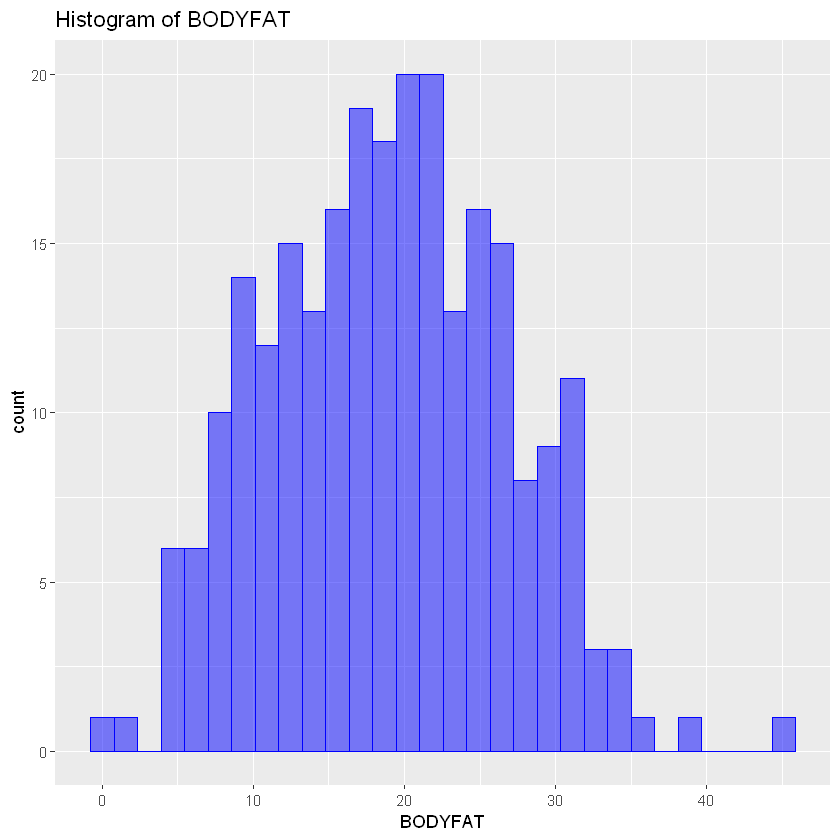

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



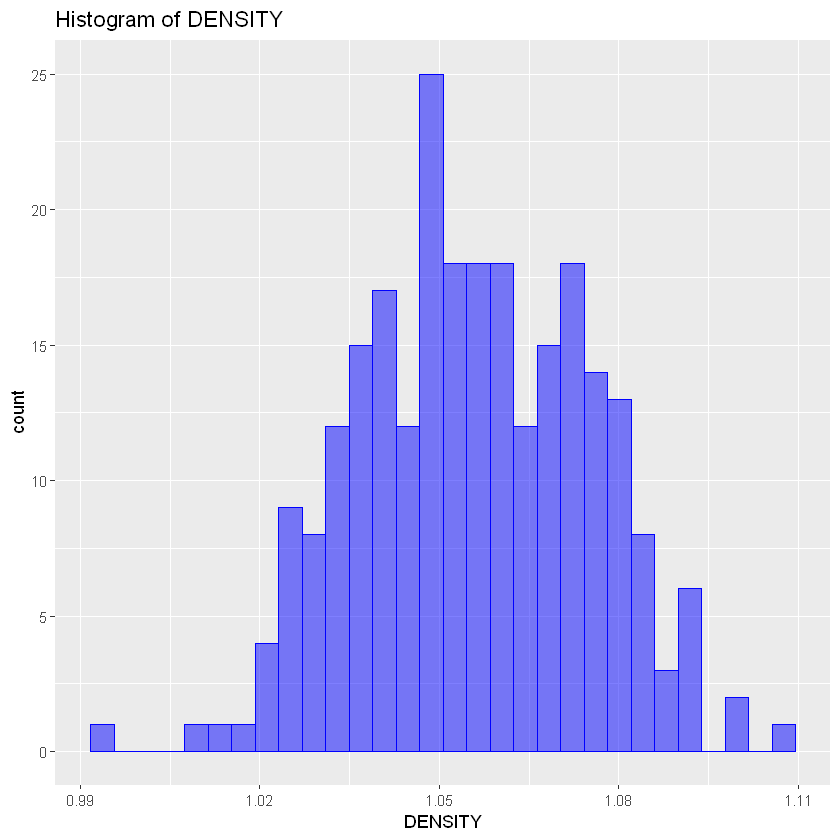

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



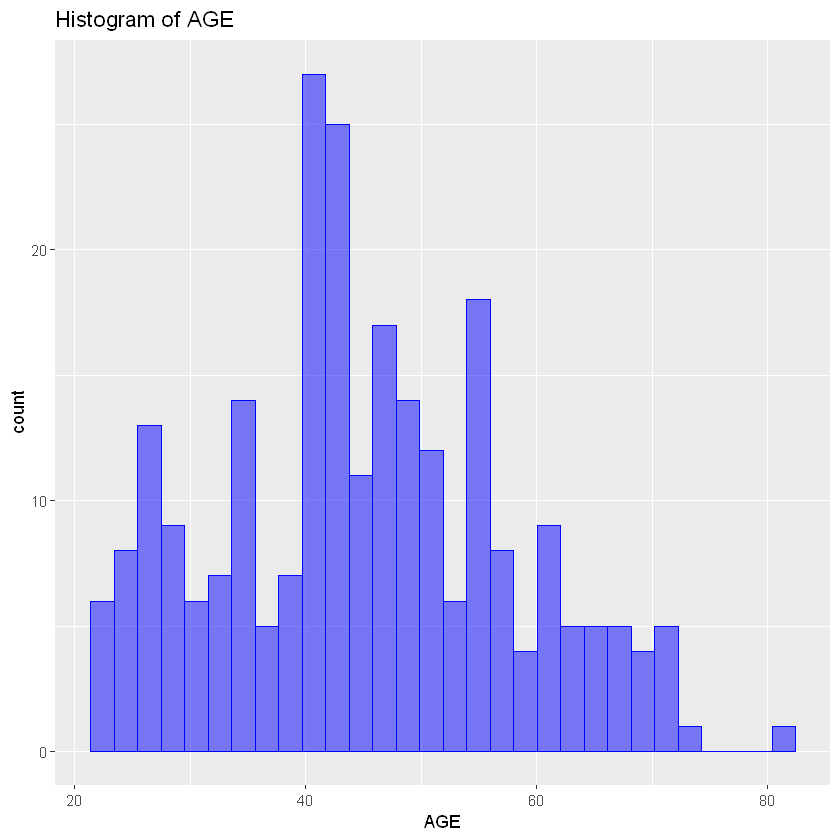

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



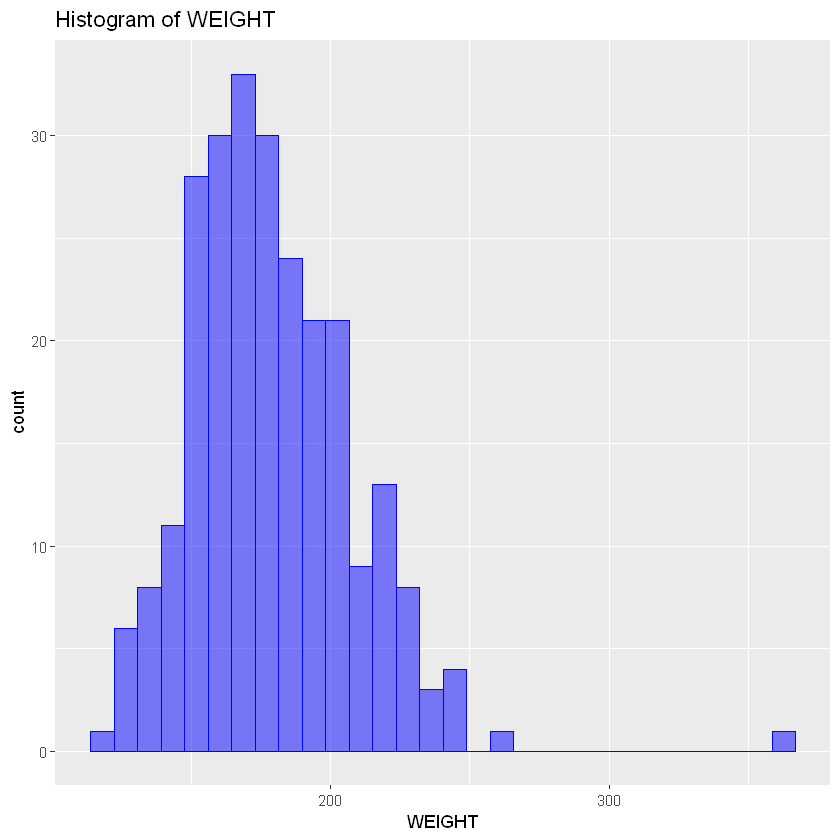

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



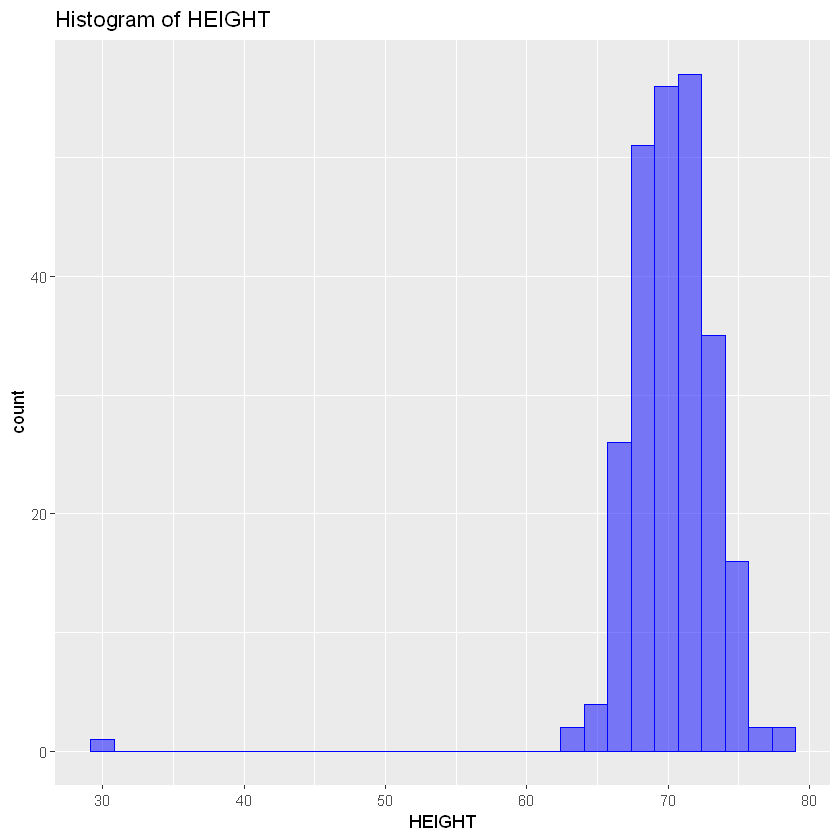

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



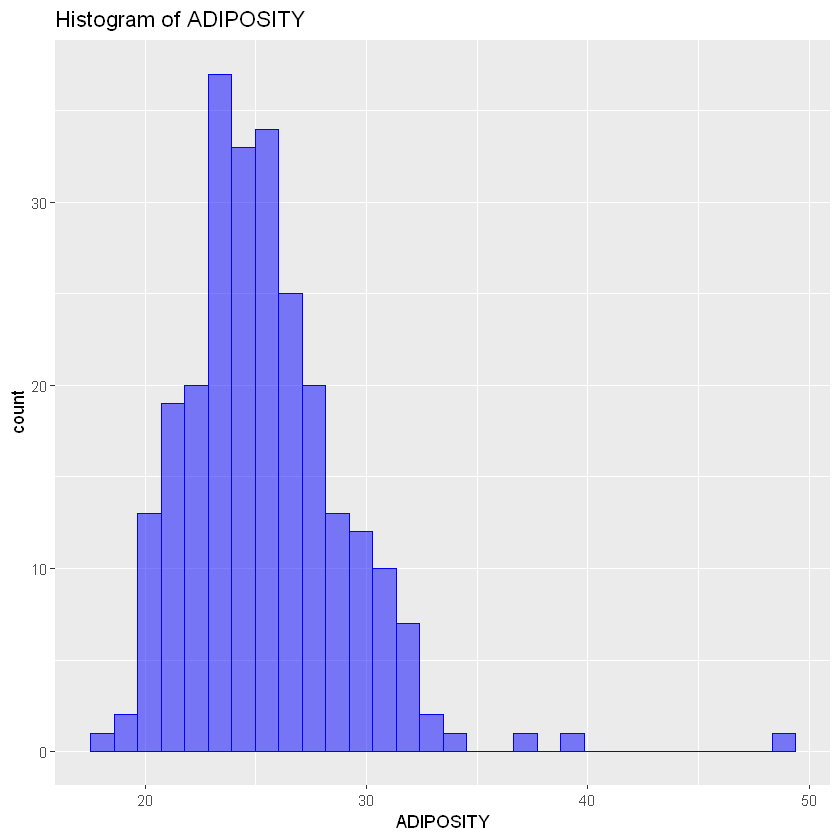

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



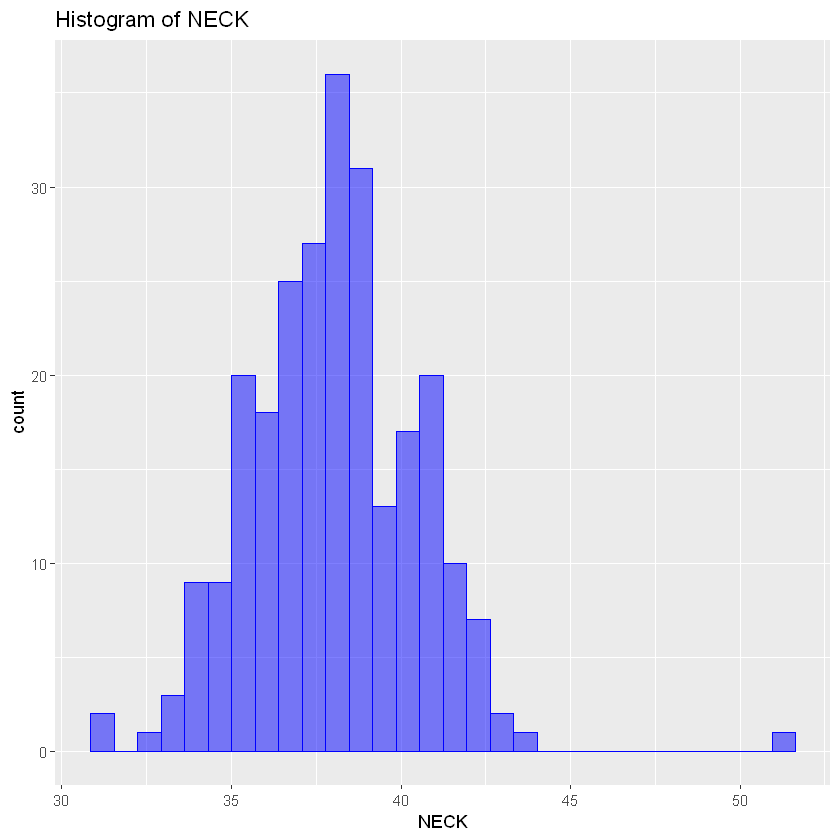

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



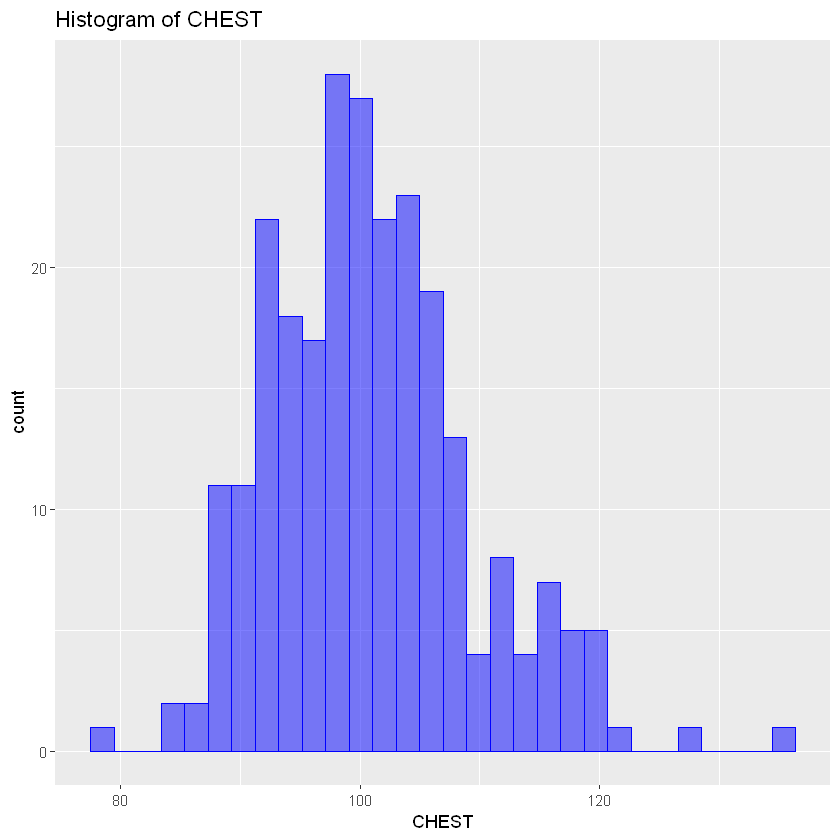

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



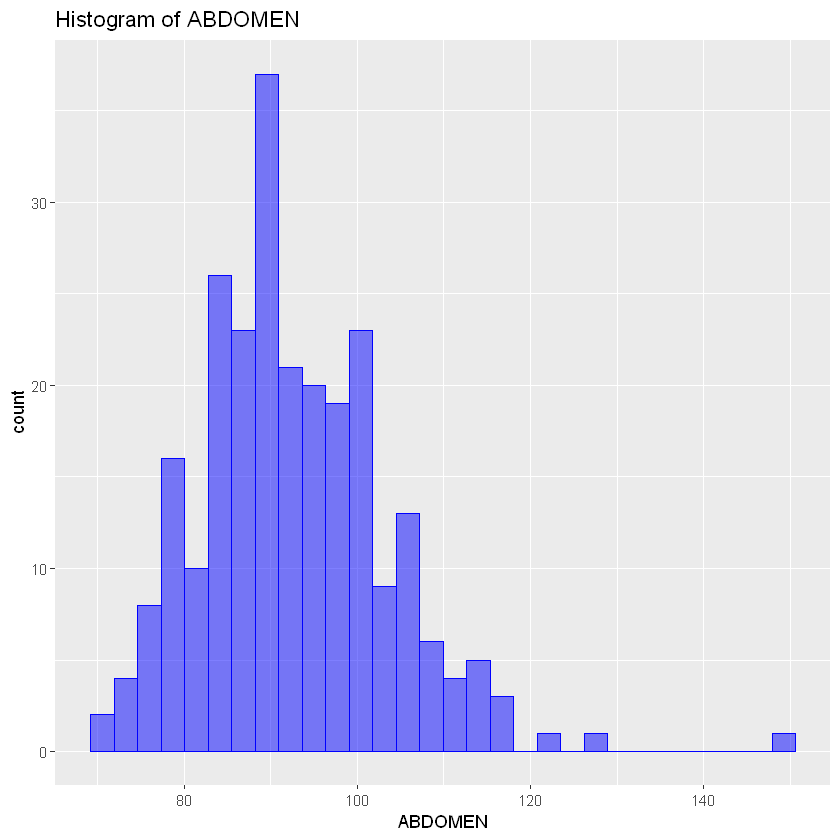

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



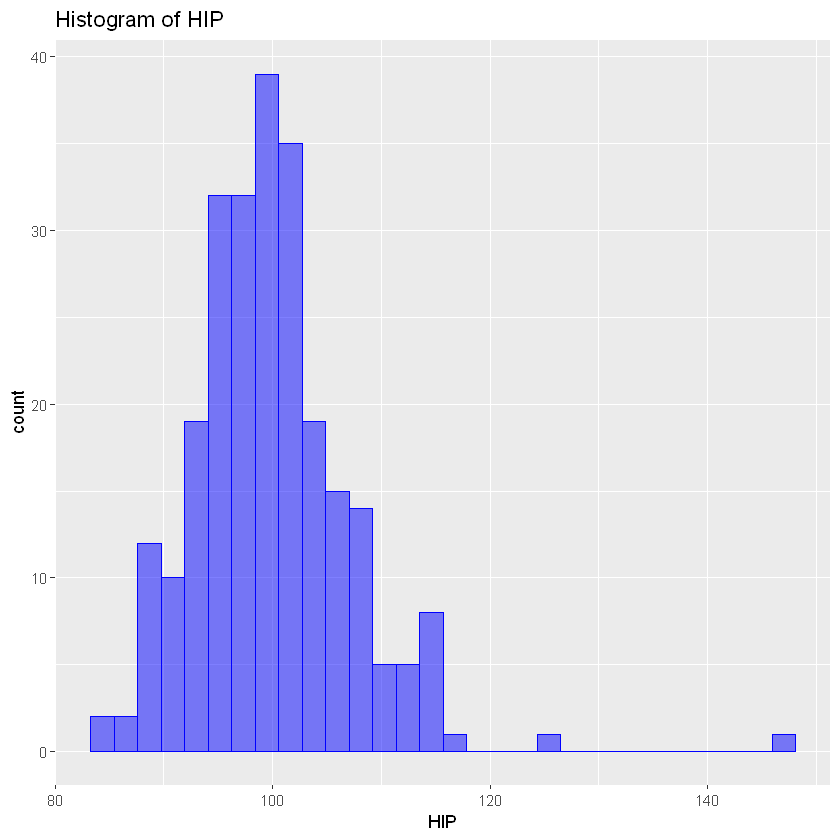

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



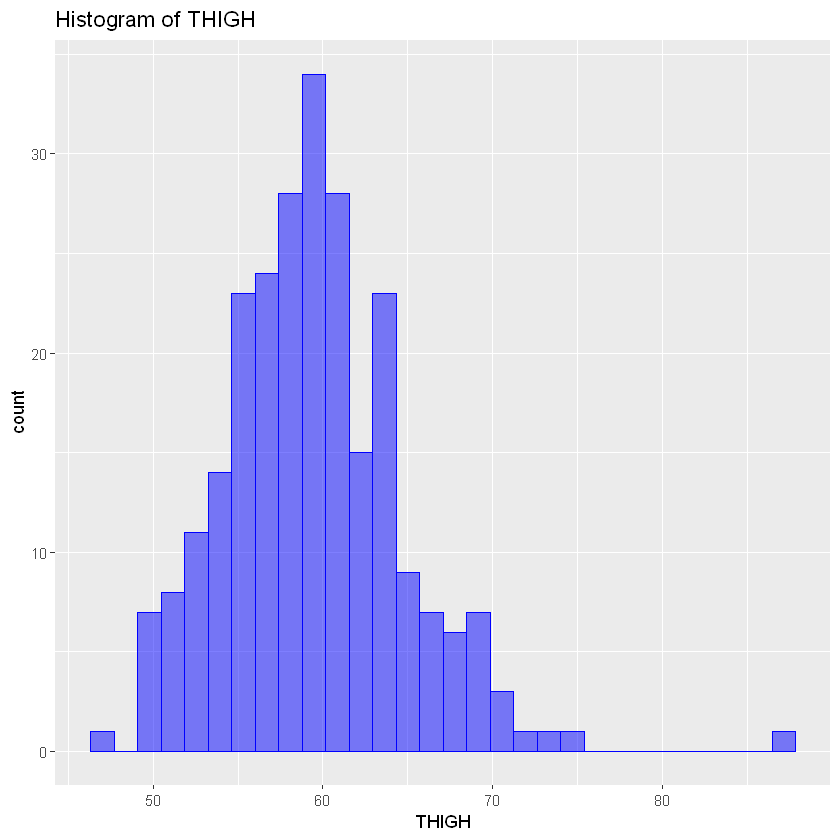

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



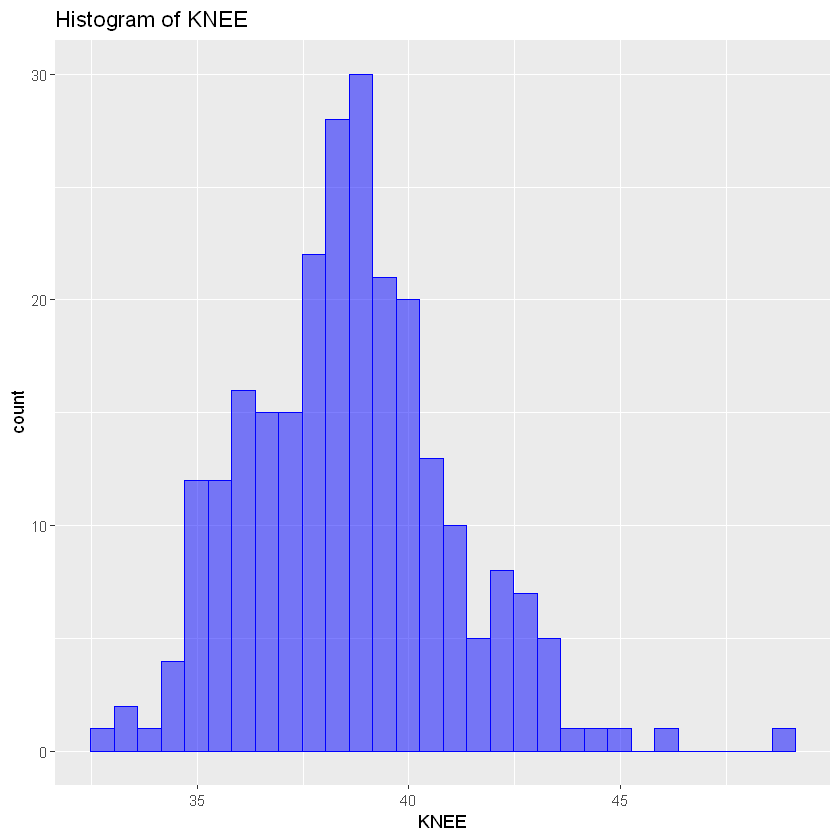

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



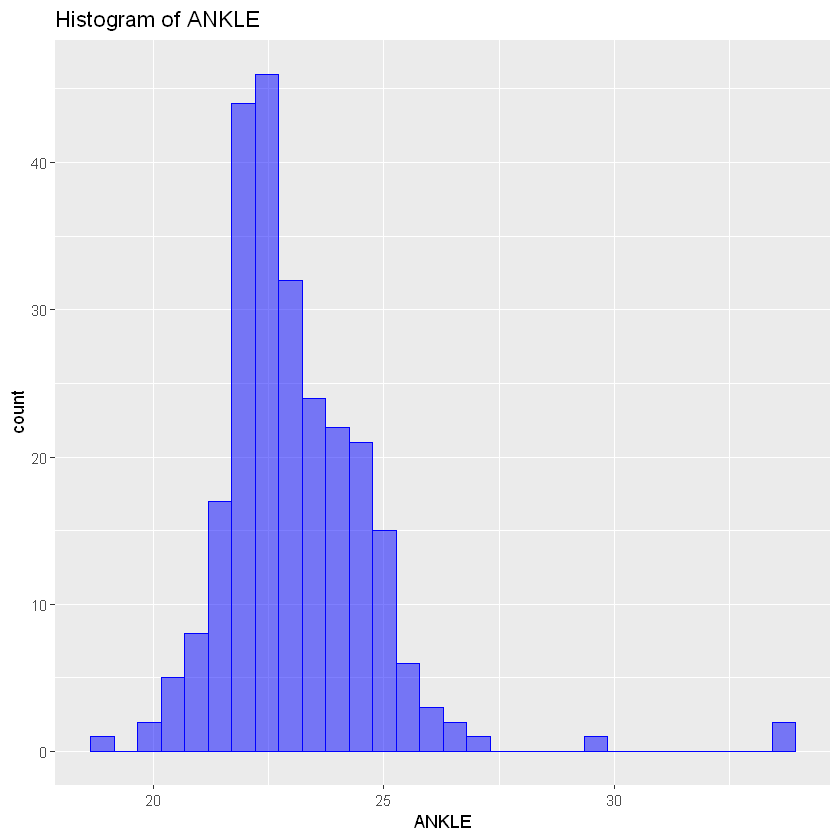

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



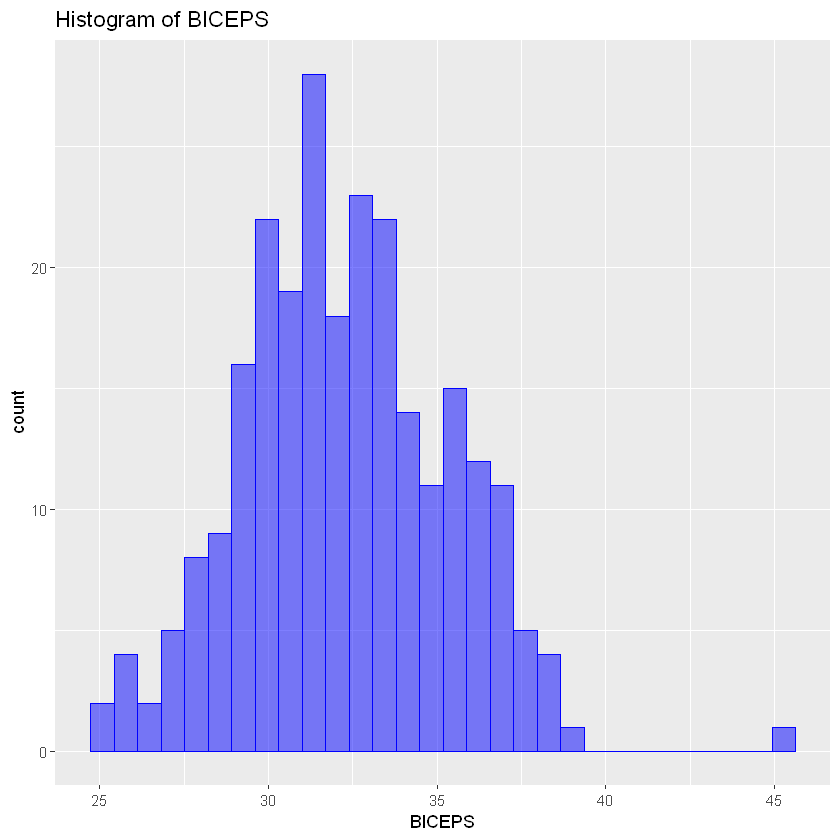

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



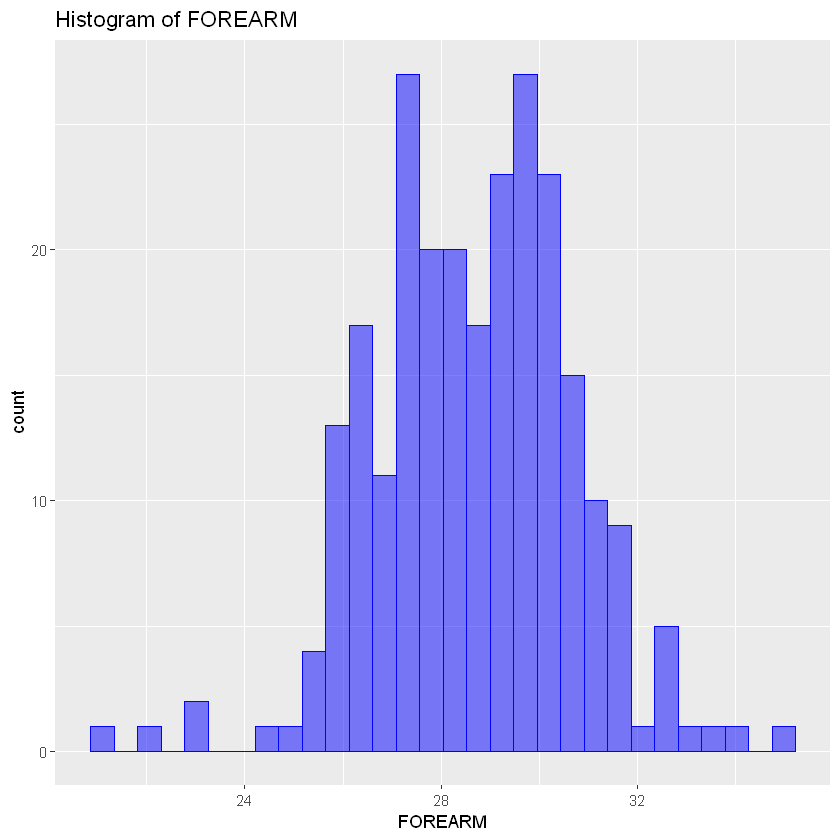

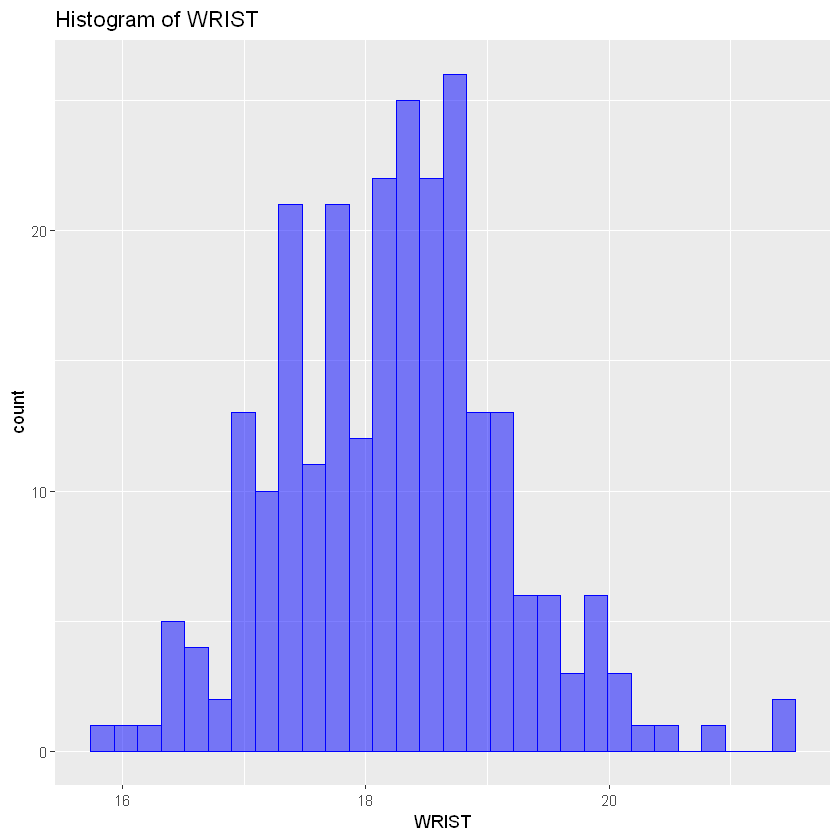

In [36]:
g1=ggplot(RawDataFrame, aes(x=BODYFAT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BODYFAT")
g2=ggplot(RawDataFrame, aes(x=DENSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of DENSITY")
g3=ggplot(RawDataFrame, aes(x=AGE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of AGE")
g4=ggplot(RawDataFrame, aes(x=WEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WEIGHT")
g5=ggplot(RawDataFrame, aes(x=HEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HEIGHT")
g6=ggplot(RawDataFrame, aes(x=ADIPOSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ADIPOSITY")
g7=ggplot(RawDataFrame, aes(x=NECK))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of NECK")
g8=ggplot(RawDataFrame, aes(x=CHEST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of CHEST")
g9=ggplot(RawDataFrame, aes(x=ABDOMEN))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ABDOMEN")
g10=ggplot(RawDataFrame, aes(x=HIP))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HIP")
g11=ggplot(RawDataFrame, aes(x=THIGH))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of THIGH")
g12=ggplot(RawDataFrame, aes(x=KNEE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of KNEE")
g13=ggplot(RawDataFrame, aes(x=ANKLE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ANKLE")
g14=ggplot(RawDataFrame, aes(x=BICEPS))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BICEPS")
g15=ggplot(RawDataFrame, aes(x=FOREARM))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of FOREARM")
g16=ggplot(RawDataFrame, aes(x=WRIST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WRIST")

ggsave("Image/BODYFAT_His.jpeg",g1)
ggsave("Image/DENSITY_His.jpeg",g2)
ggsave("Image/AGE_His.jpeg",g3)
ggsave("Image/WEIGHT_His.jpeg",g4)
ggsave("Image/HEIGHT_His.jpeg",g5)
ggsave("Image/ADIPOSITY_His.jpeg",g6)
ggsave("Image/NECK_His.jpeg",g7)
ggsave("Image/CHEST_His.jpeg",g8)
ggsave("Image/ABDOMEN_His.jpeg",g9)
ggsave("Image/HIP_His.jpeg",g10)
ggsave("Image/THIGH_His.jpeg",g11)
ggsave("Image/KNEE_His.jpeg",g12)
ggsave("Image/ANKLE_His.jpeg",g13)
ggsave("Image/BICEPS_His.jpeg",g14)
ggsave("Image/FOREARM_His.jpeg",g15)
ggsave("Image/WRIST_His.jpeg",g16)
g1
g2
g3
g4
g5
g6
g7
g8
g9
g10
g11
g12
g13
g14
g15
g16

From histogram plot you can see the distribution of every variables. There is some extreme values such as 0 BODYFAT, extreme low DENSITY, we will try remove or fix them in the following steps. 

From histograms we also can see that:

1. Most of BODYFAT fall into around 20%

2. Our observations' age is larger than 20, and a lot of them are in middle age

3. Most of variables is unimodal, just like what BODYFAT is, instead of AGE. Therefore our data collect from every age.

4. There are always some extreme high values in almost all variables, but there is few of extreme low values. So it seems that obesity is more common than thin people. 

### Boxplot of all variables

From boxplot we can detect several outliers, we will find them in dataset and study them. The boxplot contains two lines which are upper and lower quartiles. Points which are out of the range of upper and lower quartiles will be regarded as our outliers. But we will also examine them without boxplot. 

In [37]:
g1=ggplot(RawDataFrame,aes(x=BODYFAT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BODYFAT")
g2=ggplot(RawDataFrame,aes(x=DENSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("DENSITY")
g3=ggplot(RawDataFrame,aes(x=AGE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("AGE")
g4=ggplot(RawDataFrame,aes(x=WEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WEIGHT")
g5=ggplot(RawDataFrame,aes(x=HEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HEIGHT")
g6=ggplot(RawDataFrame,aes(x=ADIPOSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ADIPOSITY")
g7=ggplot(RawDataFrame,aes(x=NECK))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("NECK")
g8=ggplot(RawDataFrame,aes(x=CHEST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("CHEST")
g9=ggplot(RawDataFrame,aes(x=ABDOMEN))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ABDOMEN")
g10=ggplot(RawDataFrame,aes(x=HIP))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HIP")
g11=ggplot(RawDataFrame,aes(x=THIGH))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("THIGH")
g12=ggplot(RawDataFrame,aes(x=KNEE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("KNEE")
g13=ggplot(RawDataFrame,aes(x=ANKLE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ANKLE")
g14=ggplot(RawDataFrame,aes(x=BICEPS))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BICEPS")
g15=ggplot(RawDataFrame,aes(x=FOREARM))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("FOREARM")
g16=ggplot(RawDataFrame,aes(x=WRIST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WRIST")
g=grid.arrange(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, nrow = 4)
ggsave("Image/Boxplot_all.jpeg",g)
g

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"


ERROR: Error: stat_boxplot requires the following missing aesthetics: y


Now we will clean our dataset. Our raw data should pass three levels of data clean process: First is boxplot, check any null or abnormal value, Second, BODYFAT and DENSITY must meet Siri equation, Third, ADIPOSITY, WEIGHT and HIGHT must meet BMI formula

### Outliers of Boxplot

There is no NULL value in our dataset.

From boxplot we found the following outliers. The number after variables is the IDNO in BodyFat.csv from the boxplot of this variables.

We every outliers from boxplot, this outliers may influence our regression steps.

Outliers observation is not unrealistic one, but their existence will affect the regression and change the coefficients greatly than other do, but they are very rare in real life. In fact it is a trade off to keep the outliers. In our analysis we decide to remove them because there are only 4 outliers.

182 with BODYFAT 0, which is not shown in boxplot, reminding us to check the data again without boxplot to find outliers.

BODYFAT: 216, 182

DENSITY: 216

AGE:

WEIGHT: 39, 41

HEIGHT: 42

ADIPOSITY: 39, 41, 216, 242

NECK: 39, 45, 106

CHEST: 39, 41

ABDOMEN: 39, 41, 216

HIP: 39, 41, 35

THIGH:39, 169, 152

KNEE: 39, 244, 192

ANKLE:31, 86, 39

BICEPS:39

FOREARM:159, 206, 45,226, 175

WRIST:41,39,252,226

We only choose that outstanding outliers, which occur many times in boxplots. 

182, his BODYFAT is 0, which is impossible, calculate his BODYFAT by Siri equation, his BODYFAT should be: -3.611687, which is also impossible, we decide to delete him.

216 has outstanding BODYFAT, check his weight, we define 216 as an extremely obesity case, we decide to delete him.

39 occurs too many time in boxplot, just like 216, he is also an obesity case with too many outliers value, we decide to delete him.

42 whose HEIGHT is 29.5 inches (74.93 cm), which is too short, which can be fixed in BMI function(see below section for detail), the real HEIGHT is 69.4255 inches (176.34077 cm)

41 occurs too many time in boxplot, just like 39, he is also an obesity case with too many outliers value, we decide to delete him

In [38]:
FirstFilterData=data.frame(RawData[-c(182,216,39,41),])
realheight=sqrt(703*FirstFilterData[FirstFilterData$IDNO==42,"WEIGHT"]/FirstFilterData[FirstFilterData$IDNO==42,"ADIPOSITY"])
realheight
FirstFilterData[FirstFilterData$IDNO==42,"HEIGHT"]=realheight

[1] 69.4255

In [39]:
dim(FirstFilterData)

[1] 248  17

Now we have 248 observation. 

### Outliers of Siri Equation

There is strong connection between BODYFAT and DENSITY, which is called Siri equation:

$$\text{BODYFAT}\ (100*B)= \frac{495}{\text{DENSITY}} - 450$$

There is two ways to detect outliers with Siri equation, one is linear regression, another is calculate the BODYFAT with Siri equation.

We will try to fit the BODYFAT with 1/DENSITY and detect any outliers. 

The following four plots are outputs from linear regression between BODYFAT with 1/DENSITY

png 
  2

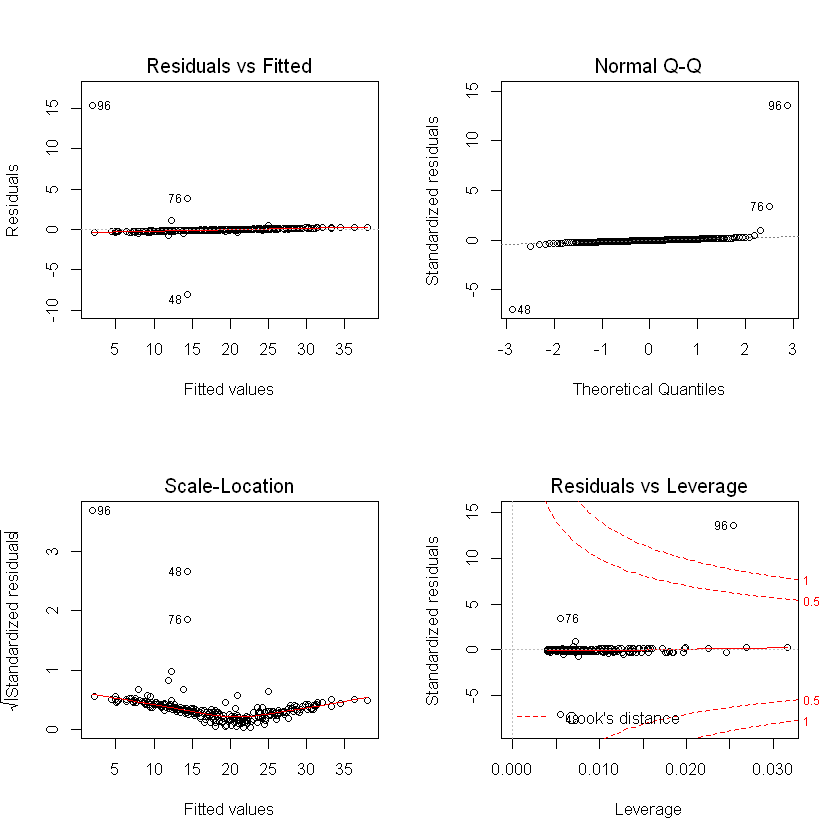

In [40]:
FirstFilterData[,"invDENSITY"]=1/FirstFilterData$DENSITY
SiriModel=lm(BODYFAT~invDENSITY,data=FirstFilterData)
par(mfrow=c(2,2)) 
plot(SiriModel)


jpeg(file="Image/Siri_Equation_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(SiriModel)
dev.off()

We plot the output of linear regression and outliers. 

Saving 6.67 x 6.67 in image



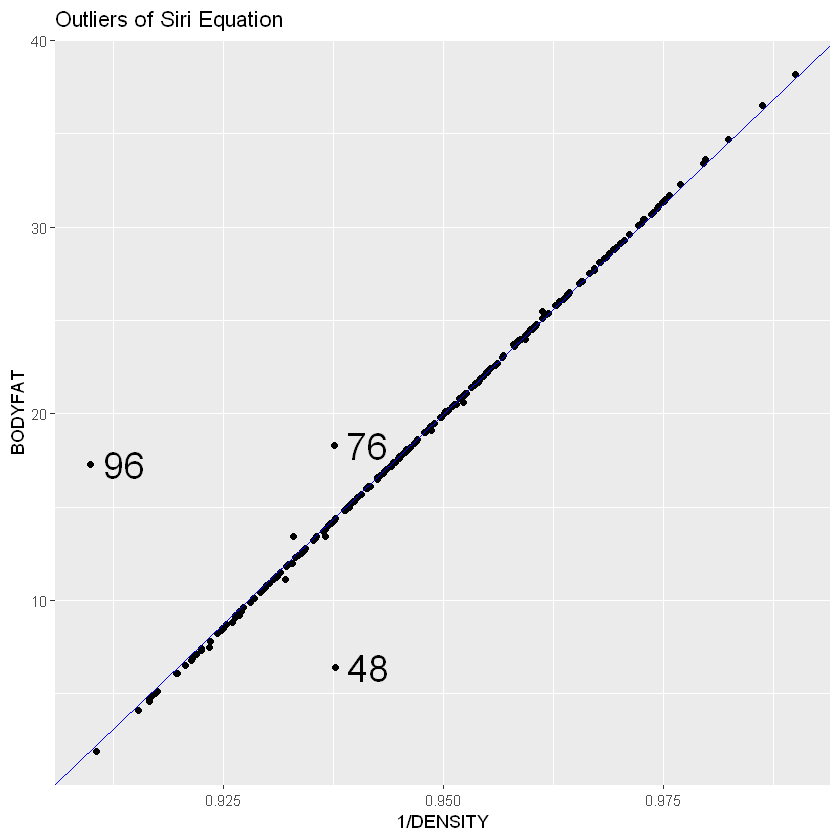

In [41]:
sirioutliers=FirstFilterData$IDNO %in% c(96, 48, 76)

g=ggplot(data=FirstFilterData)+geom_point(aes(x=invDENSITY,y=BODYFAT))+
geom_abline(intercept = SiriModel$coefficients[1],slope=SiriModel$coefficients[2],color="blue")+
xlab("1/DENSITY")+
ylab("BODYFAT")+
ggtitle("Outliers of Siri Equation")+
geom_text(data=FirstFilterData[sirioutliers,],aes(x=invDENSITY,y=BODYFAT,label=IDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_Siri_Equation.jpeg",g)
g


The second method is return the BODYFAT with Siri equation and compare the two. 

Saving 6.67 x 6.67 in image



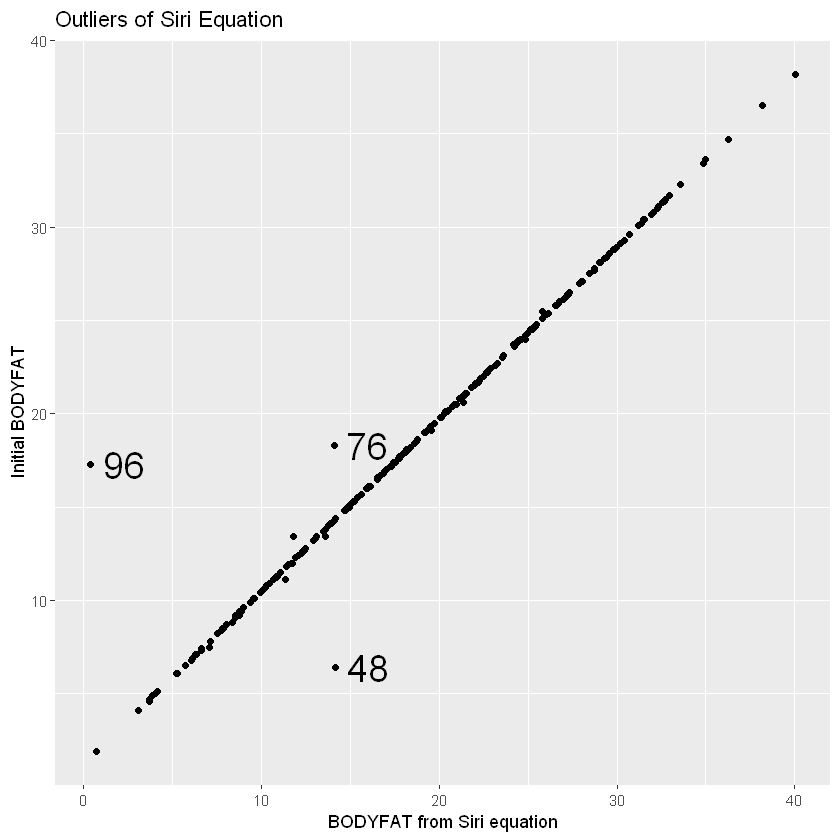

In [42]:
BODYFAT_Siri=495/FirstFilterData$DENSITY-450
OldBODYFAT=FirstFilterData$BODYFAT
OldIDNO=FirstFilterData$IDNO
sirioutliers=FirstFilterData$IDNO %in% c(96, 48, 76)
Plot_data=data.frame(cbind(BODYFAT_Siri,OldBODYFAT,OldIDNO))
g2=ggplot(data=Plot_data)+geom_point(aes(x=BODYFAT_Siri,y=OldBODYFAT))+
xlab("BODYFAT from Siri equation")+
ylab("Initial BODYFAT")+
ggtitle("Outliers of Siri Equation")+
geom_text(data=Plot_data[sirioutliers,],aes(x=BODYFAT_Siri,y=OldBODYFAT,label=OldIDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_Siri_Equation_new_bodyfat.jpeg",g2)
g2


96, 76, 48's BODYFAT do not meet their DENSITY by Siri Equation, we decide to use the Siri equation calculate their BODYFAT again and update.


In [43]:
for(i in c(96,76,48)){
  NewBODYFAT=495/FirstFilterData[FirstFilterData$IDNO==i,"DENSITY"]-450
  print(paste(i,"new BODYFAT:"))  
  print(NewBODYFAT)
}

for(i in c(96,76,48)){
  NewDENSITY=495/(FirstFilterData[FirstFilterData$IDNO==i,"BODYFAT"]+450)
  print(paste(i,"new DENSITY:"))  
  print(NewDENSITY)
}

[1] "96 new BODYFAT:"
[1] 0.3684833
[1] "76 new BODYFAT:"
[1] 14.09151
[1] "48 new BODYFAT:"
[1] 14.13502
[1] "96 new DENSITY:"
[1] 1.059277
[1] "76 new DENSITY:"
[1] 1.057015
[1] "48 new DENSITY:"
[1] 1.084575


We found that the new BODYFAT of 96 is too small compared with other people, so we decide to use the his initial BODYFAT to update his DENSITY with Siri equation, instead of changing his BODYFAT. BODYFAT of 48 also changed too high, but considering that BODYFAT is from DENSITY by Siri equation, we prefer to change BODYFAT first. 


In [44]:
SecondFilterData=FirstFilterData[,-which(names(FirstFilterData) %in% c("invDENSITY"))]
SecondFilterData[SecondFilterData$IDNO==48,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==48,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==76,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==76,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==96,"DENSITY"]=495/(SecondFilterData[SecondFilterData$IDNO==96,"BODYFAT"]+450)

### Outliers of BMI Equation

Just like BODYFAT and DENSITY. WEIGHT, HEIGHT and ADIPOSITY also meet BMI equation:

$$\text{ADIPOSITY} = \frac{703*\text{WEIGHT (lbs)}}{\text{HEIGHT(inches)}^{2}} $$

This equation is in imperial unit, pay attention to 703 in our equation. 

There are also two method to detect outliers.

The following four plots are outputs from linear regression between ADIPOSITY with WEIGHT/HEIGHT^2

We call the new variable with weight, height as BMIX

png 
  2

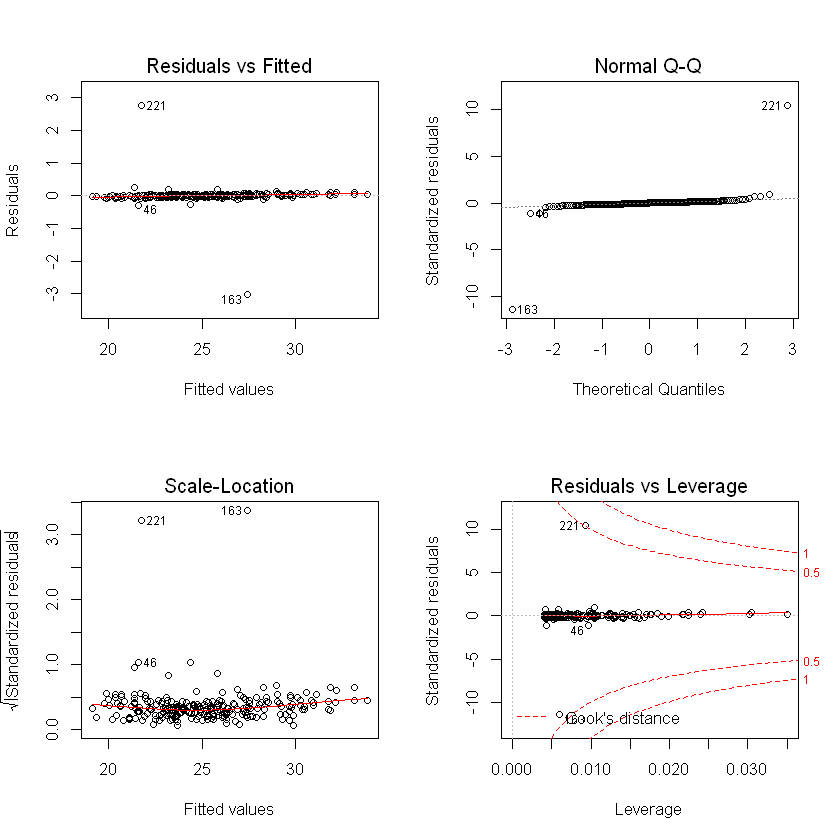

In [45]:
SecondFilterData[,"BMIX"]=(SecondFilterData$WEIGHT)/((SecondFilterData$HEIGHT)^2)
BMIModel=lm(ADIPOSITY~BMIX,data=SecondFilterData)
par(mfrow=c(2,2)) 
plot(BMIModel)
jpeg(file="Image/BMI_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(BMIModel)
dev.off()

We plot the output of linear regression and outliers. 

Saving 6.67 x 6.67 in image



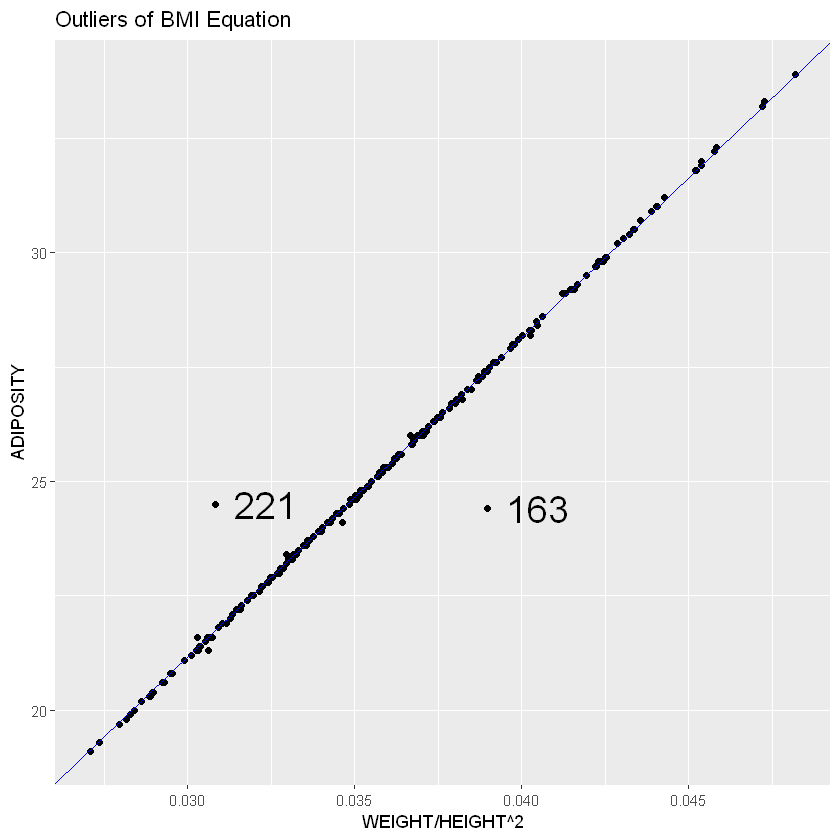

In [46]:
bmioutliers=SecondFilterData$IDNO %in% c(221, 163)

g=ggplot(data=SecondFilterData)+geom_point(aes(x=BMIX,y=ADIPOSITY))+
geom_abline(intercept = BMIModel$coefficients[1],slope=BMIModel$coefficients[2],color="blue")+
xlab("WEIGHT/HEIGHT^2")+
ylab("ADIPOSITY")+
ggtitle("Outliers of BMI Equation")+
geom_text(data=SecondFilterData[bmioutliers,],aes(x=BMIX,y=ADIPOSITY,label=IDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_BMI_Equation.jpeg",g)
g

The second method is return the ADIPOSITY with BMI equation and compare the two.

Saving 6.67 x 6.67 in image



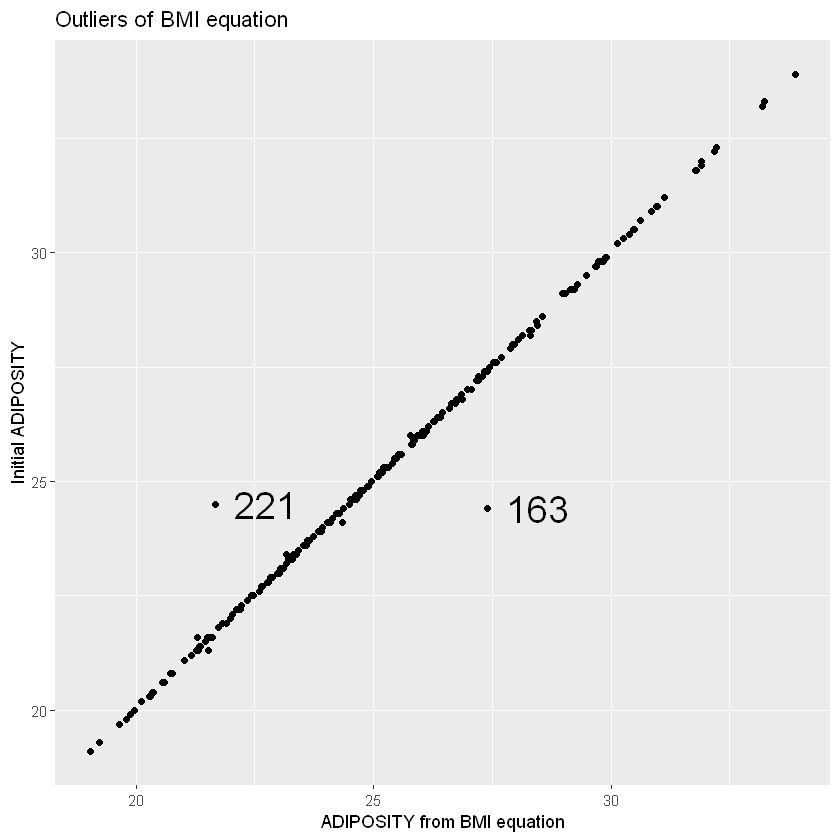

In [47]:
ADIPOSITY_BMI=703*SecondFilterData$WEIGHT/(SecondFilterData$HEIGHT)^2
OldADIPOSITY=SecondFilterData$ADIPOSITY
OldIDNO=SecondFilterData$IDNO
bmioutliers=SecondFilterData$IDNO %in% c(221, 163)
Plot_data=data.frame(cbind(ADIPOSITY_BMI,OldADIPOSITY,OldIDNO))
g2=ggplot(data=Plot_data)+geom_point(aes(x=ADIPOSITY_BMI,y=OldADIPOSITY))+
xlab("ADIPOSITY from BMI equation")+
ylab("Initial ADIPOSITY")+
ggtitle("Outliers of BMI equation")+
geom_text(data=Plot_data[bmioutliers,],aes(x=ADIPOSITY_BMI,y=OldADIPOSITY,label=OldIDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_BMI_Equation_new_ADIPOSITY.jpeg",g2)
g2


The two outliers is 221 and 163, their new BMI is:

In [48]:
NewBMI=c()
for(i in c(163,221)){
  NewBMI=c(NewBMI,703*SecondFilterData[SecondFilterData$IDNO==i,"WEIGHT"]/(SecondFilterData[SecondFilterData$IDNO==i,"HEIGHT"]^2))
  print(paste(i,"new BMI is:"))
  print(703*SecondFilterData[SecondFilterData$IDNO==i,"WEIGHT"]/(SecondFilterData[SecondFilterData$IDNO==i,"HEIGHT"]^2))
}
NewBMI

[1] "163 new BMI is:"
[1] 27.40422
[1] "221 new BMI is:"
[1] 21.67592


[1] 27.40422 21.67592

No problem, they are in normal range, update their new BMI:

In [49]:
CleanData=SecondFilterData[,-which(names(SecondFilterData) %in% c("BMIX"))]
CleanData[CleanData$IDNO==163,"ADIPOSITY"]=NewBMI[1]
CleanData[CleanData$IDNO==221,"ADIPOSITY"]=NewBMI[2]
CleanData=data.frame(CleanData)
dim(CleanData)

[1] 248  17

Now we can update our data:

In [50]:
write.csv(CleanData,'Data/CleanData.csv',row.names = FALSE)

We can build a table for what we do in our dataset:

In [51]:
Fixed_IDNO=c(182,216,39,41,42,96,76,48,221,163)
Method=c("Delete for extreme value",
         "Delete for extreme value",
         "Delete for extreme value",
         "Delete for extreme value",
         "Fix HEIGHT by BMI equation",
         "Fix DENSITY by Siri equation",
         "Fix BODYFAT by Siri equation",
         "Fix BODYFAT by Siri equation",
         "Fix ADIPOSITY by BMI equation",
         "Fix ADIPOSITY by BMI equation")
Fix_Method=cbind(Fixed_IDNO,Method)
Fix_Method

Fixed_IDNO,Method
182,Delete for extreme value
216,Delete for extreme value
39,Delete for extreme value
41,Delete for extreme value
42,Fix HEIGHT by BMI equation
96,Fix DENSITY by Siri equation
76,Fix BODYFAT by Siri equation
48,Fix BODYFAT by Siri equation
221,Fix ADIPOSITY by BMI equation
163,Fix ADIPOSITY by BMI equation


In fact, there is a lot of extreme value in our dataset, especially in regression steps. But considering there is only about 250 observations, we prefer to fix observations instead of deleting them.

## Recheck by BMI and Siri equation

Recheck whether our CleanData meets BMI and Siri equation.

### Siri equation

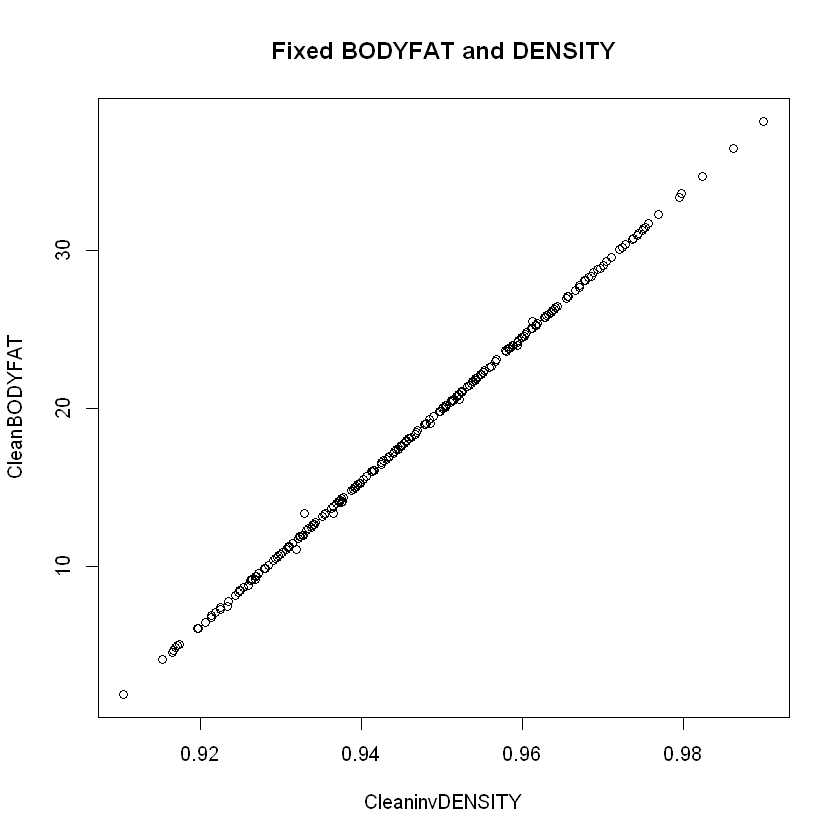

png 
  2

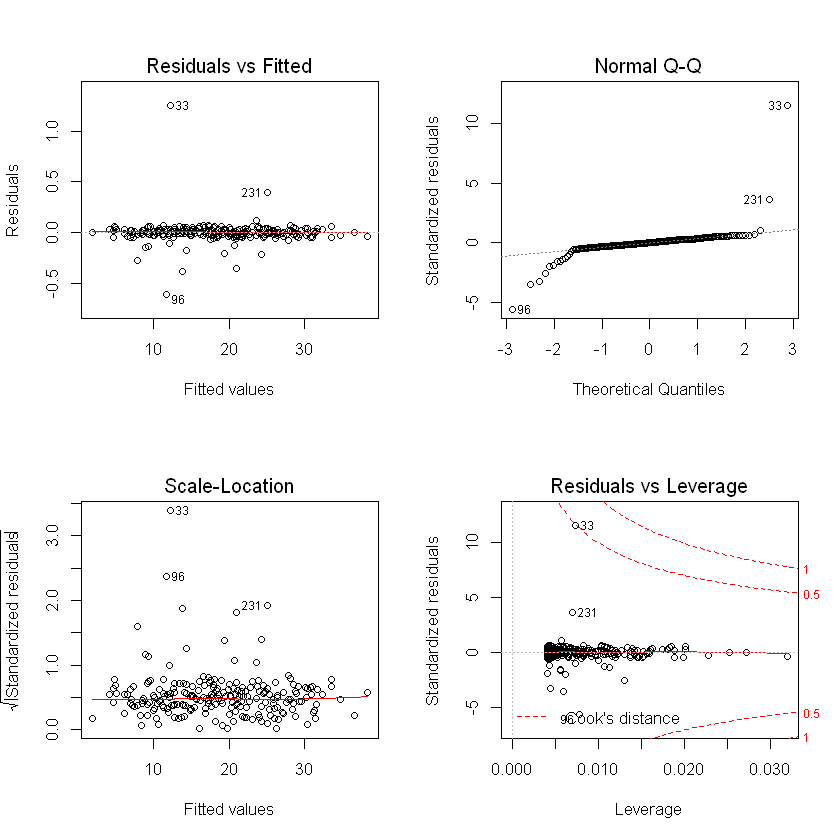

In [52]:
CleaninvDENSITY=1/(CleanData$DENSITY)
CleanBODYFAT=CleanData$BODYFAT
SiriModel=lm(CleanBODYFAT~CleaninvDENSITY)
plot(CleanBODYFAT~CleaninvDENSITY,main="Fixed BODYFAT and DENSITY")
par(mfrow=c(2,2)) 
plot(SiriModel)

jpeg(file="Image/Fixed_BODYFAT_and_DENSITY.jpeg")
par(mfrow=c(3,2))
plot(CleanBODYFAT~CleaninvDENSITY,main="Fixed BODYFAT and DENSITY") 
plot(SiriModel)
dev.off()

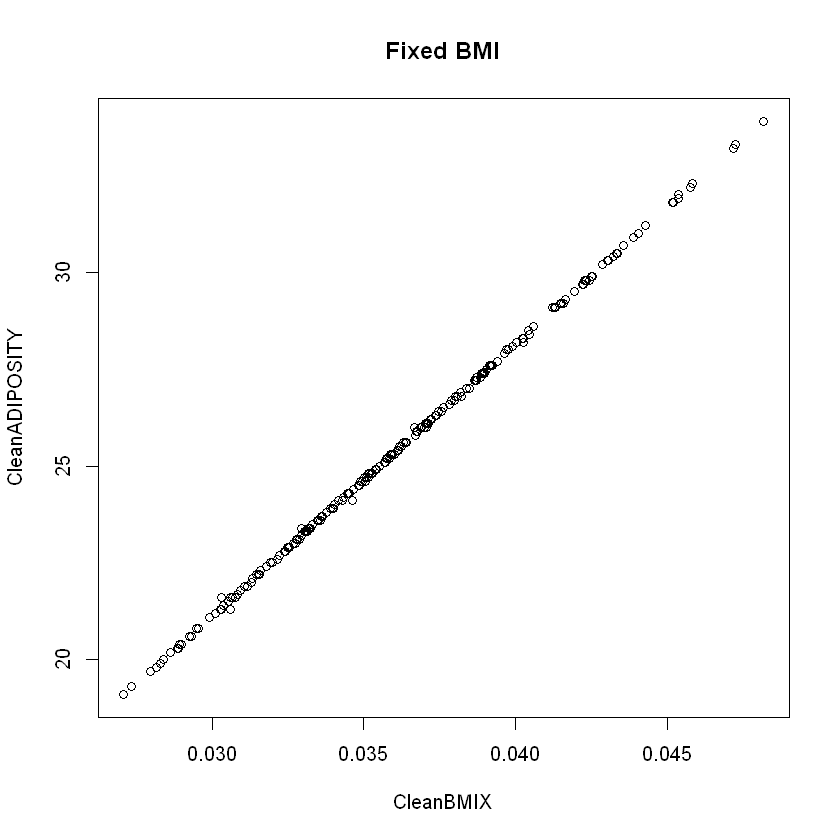

png 
  2

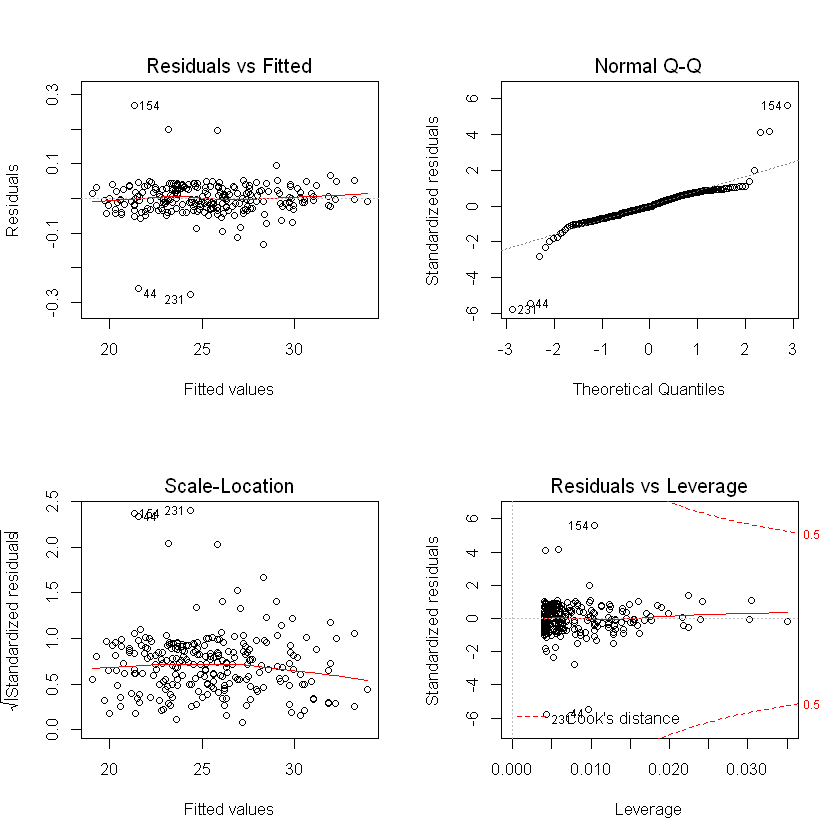

In [53]:

CleanADIPOSITY=CleanData$ADIPOSITY
CleanBMIX=(CleanData$WEIGHT)/((CleanData$HEIGHT)^2)
BMIModel=lm(CleanADIPOSITY~CleanBMIX)
plot(CleanADIPOSITY~CleanBMIX,main="Fixed BMI")
par(mfrow=c(2,2)) 
plot(BMIModel)

jpeg(file="Image/Fixed_BMI.jpeg")
par(mfrow=c(3,2))
plot(CleanADIPOSITY~CleanBMIX,main="Fixed BMI") 
plot(BMIModel)
dev.off()

There is no outliers from BMI and Siri equation now. 

## Model Build-Linear Regression

Therefore, we decide to use linear regression to build our model, which is simple and easily to explained. Input our CleanData, and we will not use DENSITY in our following steps

In [54]:
RawCleanData = read.csv("Data/CleanData.csv",sep=",")
head(RawCleanData)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


IDNO and DENSITY will not be included into our model. 

In [55]:
WholeCleanData=RawCleanData
CleanData=RawCleanData[,-c(1,3)]
n=dim(CleanData)[1]
head(CleanData)
dim(CleanData)

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


[1] 248  15

### Heat plot for correlation

Calculate the correlation between two variables

png 
  2

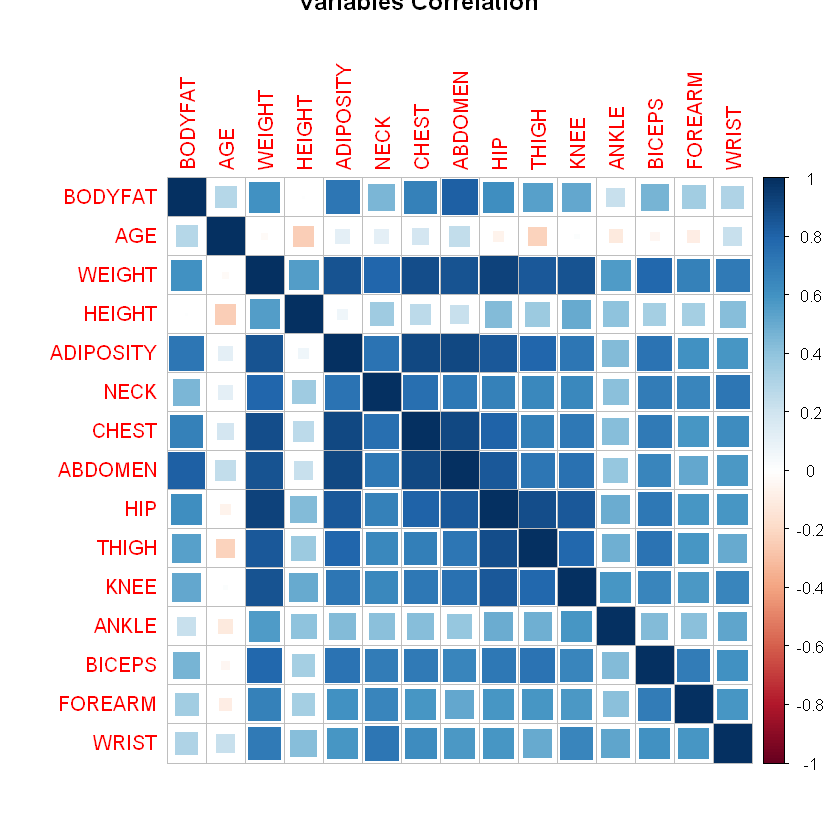

In [56]:
corr=cor(CleanData)
corrplot(corr,title='Variables Correlation', method = "square")
jpeg(file="Image/Variables Correlation.jpeg")
corr=cor(CleanData)
corrplot(corr,title='Variables Correlation', method = "square")
dev.off()

Most of variables are highly correlated, we will consider the simple model with as few variables as possible in our model.

### VIF test

We test the VIF of the simple linear regression of all variables. VIF show the multicollinearity in linear regression model. Once the max VIF is larger than 10 or mean variables' VIF is larger than 1. We regard there exists multicollinearity. Multicollinearity is harmful to model, the model with too many variables which has multicollinearity may be regarded as ill one.

In [57]:
SLR = lm(BODYFAT~.,data=CleanData) 
vif = car::vif(SLR) 
mean(vif) 
rbind(vif)

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): there is no package called 'foreign'


Weight enjoys the largest VIF, and there exist serious multicollinearity in our data, therefore in our model we will consider as few variables as possible. 

### BOXCOX test

BOXCOX test can show is there any necessary to transformation, the $\lambda$ from BOXCOX is an optimal for transformation as:

$$
y(\lambda)=\left\{\begin{array}{ll}\frac{y^{\lambda}-1}{\lambda}, & \text { if } \lambda \neq 0 \\ \log y, & \text { if } \lambda=0\end{array}\right.
$$

In [58]:
bc=boxCox(SLR)
lambda=bc$x[which(bc$y==max(bc$y))]
lambda

ERROR: Error in boxCox(SLR): could not find function "boxCox"


The $\lambda$ is close to 1. It seems that there is no necessary for transformation.

### Simple linear regression of all variables

First we will try use simple linear regression on all variables. In the following output we can see that there is a lot of variables are not significant from p-value, means that there may be not necessary to take them into consideration when we build our model, therefore we will run variables selection steps to simplify our model.

In [59]:
summary(SLR)


Call:
lm(formula = BODYFAT ~ ., data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6479 -2.8415 -0.1324  2.8516  9.1206 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -80.51943   54.53989  -1.476  0.14120    
AGE           0.06517    0.02941   2.216  0.02768 *  
WEIGHT       -0.24634    0.15259  -1.614  0.10779    
HEIGHT        1.04965    0.77730   1.350  0.17820    
ADIPOSITY     1.85337    1.10641   1.675  0.09525 .  
NECK         -0.39647    0.21546  -1.840  0.06702 .  
CHEST        -0.14858    0.10189  -1.458  0.14613    
ABDOMEN       0.81367    0.08477   9.599  < 2e-16 ***
HIP          -0.18763    0.13851  -1.355  0.17686    
THIGH         0.16395    0.13671   1.199  0.23164    
KNEE         -0.03708    0.24126  -0.154  0.87800    
ANKLE         0.11686    0.20334   0.575  0.56605    
BICEPS        0.14475    0.15804   0.916  0.36068    
FOREARM       0.22848    0.19125   1.195  0.23344    
WRIST        -1.59006    0.497

png 
  2

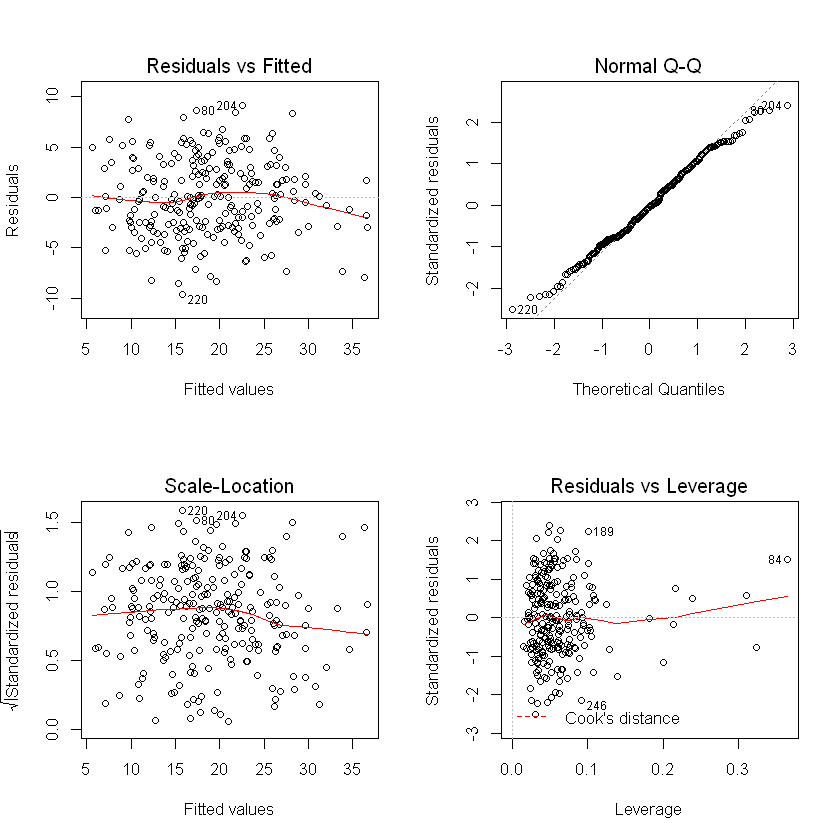

In [60]:
par(mfrow=c(2,2)) 
plot(SLR) 

jpeg(file="Image/Simple_Linear_Regression_Analysis.jpeg")
par(mfrow=c(2,2)) 
plot(SLR) 
dev.off()

## Variable selection-Regression Trees

In [61]:
library(gbm)
library(randomForest)
set.seed(628)
train.ind <- sample(1:nrow(CleanData),0.6*nrow(CleanData))
train.dat <- CleanData[train.ind,]
test.dat <- CleanData[-train.ind,]

Decision tree is a machine learning method that can be applied to both regression and classification problems. With decision tree, we can capture the variables that plays important role on our outcome. Decision tree split the dataset into many of square regions. Several number of step need to be taken in this spliting steps. In each step, by the some meaningful value(threshold) of a variable, the dataset  divided into two region and after that one of two region also divided into two according to another meaningful value(threshold) of another variable. This step should be taken until the very last of variable. Our goal is to find square regions R1,...,Rj that minimize the RSS given by

$$
    RSS=\sum_{j=1}^{J}\sum_{i \in Rj}(y_{i}-\hat{y}_{Rj})^{2}
$$

Usually decision tree are used with some algorithms, since the decision tree's mechanism is using recursive binary splitting so it can produce different result in every different attempt. Hence, we used boosting, random forest and bagging algorithms.

Since all variables we have in our dataset are quantitative variables, we used regression tree to analyze data. The regression tree gives us the important variables that play an important role in outcome(Bodyfat). We divided our dataset in to two different dataset which are training dataset and test dataset. We decided to train our data first and then fit the trained model on test dataset. Normally, there are two important hyperparameter in regression tree with boosting, which are interaction depth and lambada (About tuning hyperparameters and its role refer An Introduction to Statistical Learning (2013) G.James et al. page 316-324.).

At the first step, we had looked for a lambda value that returns minimum of mean square error.

[1] 0.01584893

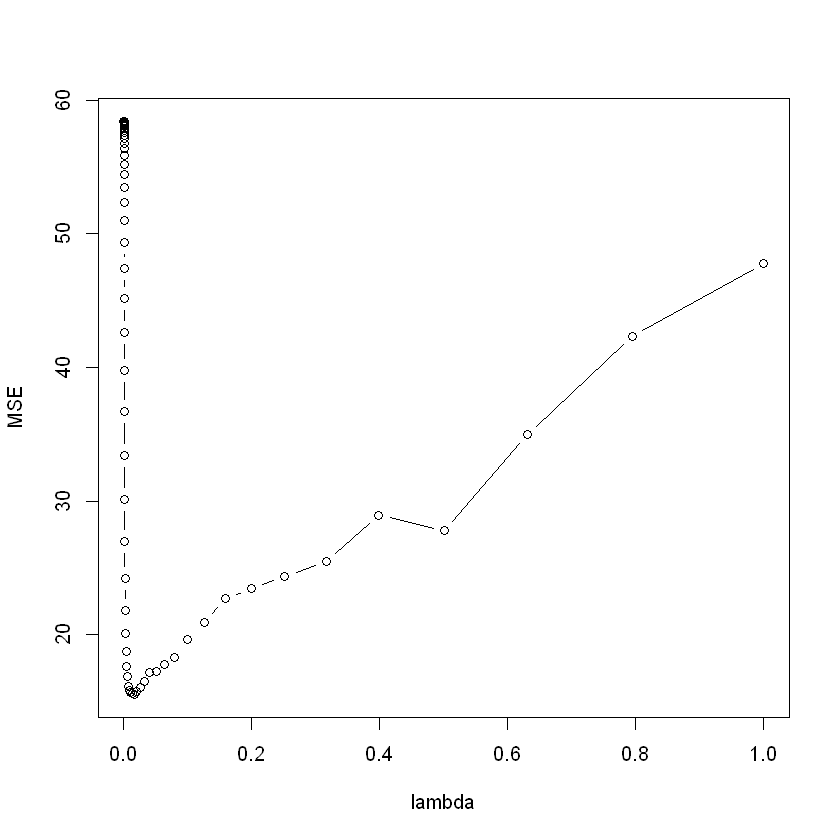

In [63]:
pow <- seq(-10, 0, by = 0.1)
lambdas <- 10^pow
test.boosting.MSE <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
  set.seed(628)
  boost.dat <- gbm(BODYFAT~.-BODYFAT, data = train.dat, n.trees=1000, interaction.depth = 1, distribution = "gaussian", shrinkage = lambdas[i], cv.folds = 10)
  test.pred <- predict(boost.dat, test.dat, n.trees=1000)
  test.boosting.MSE[i] <- sum((test.dat$BODYFAT-test.pred)^2)/dim(test.dat)[1]
}
plot(lambdas, test.boosting.MSE, type="b", xlab = "lambda", ylab="MSE")

min.lambda <- lambdas[which.min(test.boosting.MSE)]
min.lambda


Here, we picked the lambda that minimize the mean squared error(MSE), 0.0158.

In [64]:
#boosting with depth =1
test.boosting.MSE1 <- rep(NA, 1000)
for (i in 1:1000) {
  set.seed(628)
  boost.dat <- gbm(BODYFAT~.-BODYFAT, data = train.dat, n.trees=i, interaction.depth = 1, distribution = "gaussian", shrinkage = min.lambda)
  test.pred <- predict(boost.dat, test.dat, n.trees=i)
  test.boosting.MSE1[i] <- sum((test.dat$BODYFAT-test.pred)^2)/dim(test.dat)[1]
}

#boosting with depth =2
test.boosting.MSE2 <- rep(NA, 1000)
for (i in 1:1000) {
  set.seed(628)
  boost.dat <- gbm(BODYFAT~.-BODYFAT, data = train.dat, n.trees=i, interaction.depth = 2, distribution = "gaussian", shrinkage = min.lambda)
  test.pred <- predict(boost.dat, test.dat, n.trees=i)
  test.boosting.MSE2[i] <- sum((test.dat$BODYFAT-test.pred)^2)/dim(test.dat)[1]
}

#randomforest
test.rf.MSE <- rep(NA, length=1000)
for(i in 1:1000){
  set.seed(628)
  rf.dat = randomForest(BODYFAT~.-BODYFAT, data=train.dat, mtry = floor(sqrt(14)), ntree=i)
  yhat.rf = predict(rf.dat, newdata = test.dat)
  test.rf.MSE[i] <- sum((test.dat$BODYFAT-yhat.rf)^2)/dim(test.dat)[1]
  }

#bagging
test.bag.MSE <- rep(NA, length=1000)
for(i in 1:1000){
  set.seed(628)
  bag.dat = randomForest(BODYFAT~.-BODYFAT, data=train.dat, mtry = 14, ntree=i)
  yhat.bag = predict(bag.dat, newdata = test.dat)
  test.bag.MSE[i] <- sum((test.dat$BODYFAT-yhat.bag)^2)/dim(test.dat)[1]
  }

For the second step we used four different analysis methods to see which performs better on our dataset, and produced the plots according to the number of trees.

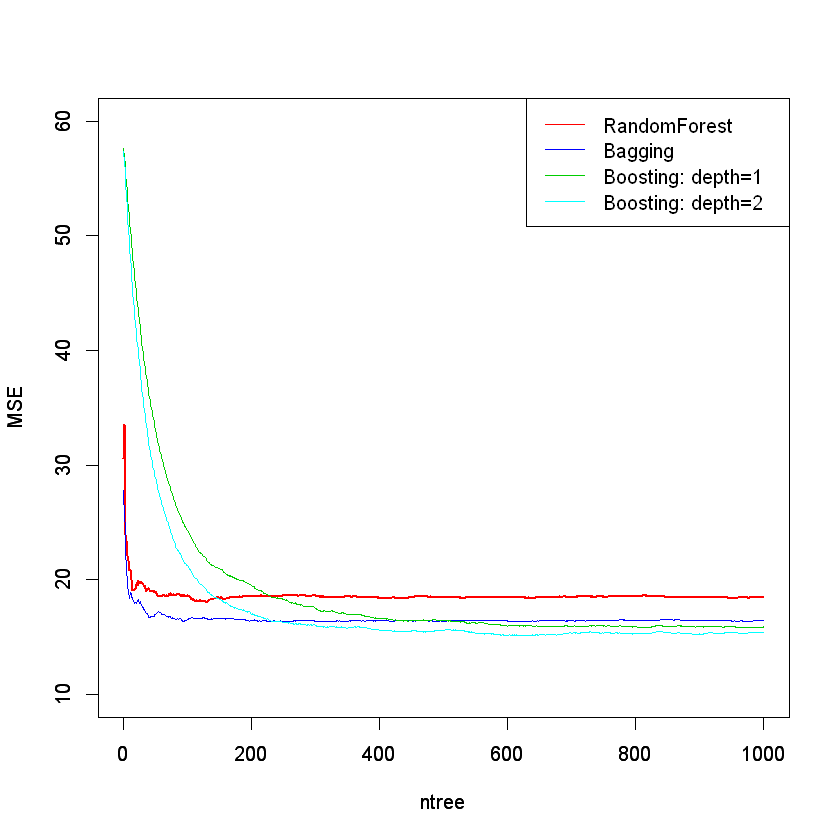

In [65]:
ntree <- 1:1000
plot(ntree, test.rf.MSE, type = 'l', ylab="MSE", col=2, ylim=c(10,60), lwd = 2)
par(new=T)
plot(ntree, test.bag.MSE, type = 'l', ylab="MSE", ylim=c(10,60), col=4)
par(new=T)
plot(ntree, test.boosting.MSE1, type = 'l', ylab="MSE", ylim=c(10,60), col=3)
par(new=T)
plot(ntree, test.boosting.MSE2, type = 'l', ylab="MSE", ylim=c(10,60), col=5)
legend("topright", c("RandomForest","Bagging","Boosting: depth=1", "Boosting: depth=2"), lwd=c(1,1), col=c(2,4,3,5))

By the plot. we acknowledge that Bagging and Boosting with depth 2 performs well on our dataset

,IncNodePurity
AGE,305.4018
WEIGHT,313.5280
HEIGHT,515.0051
ADIPOSITY,245.4237
NECK,360.6705
CHEST,237.3548
ABDOMEN,9464.3235
HIP,267.4123
THIGH,228.8360
KNEE,241.0849


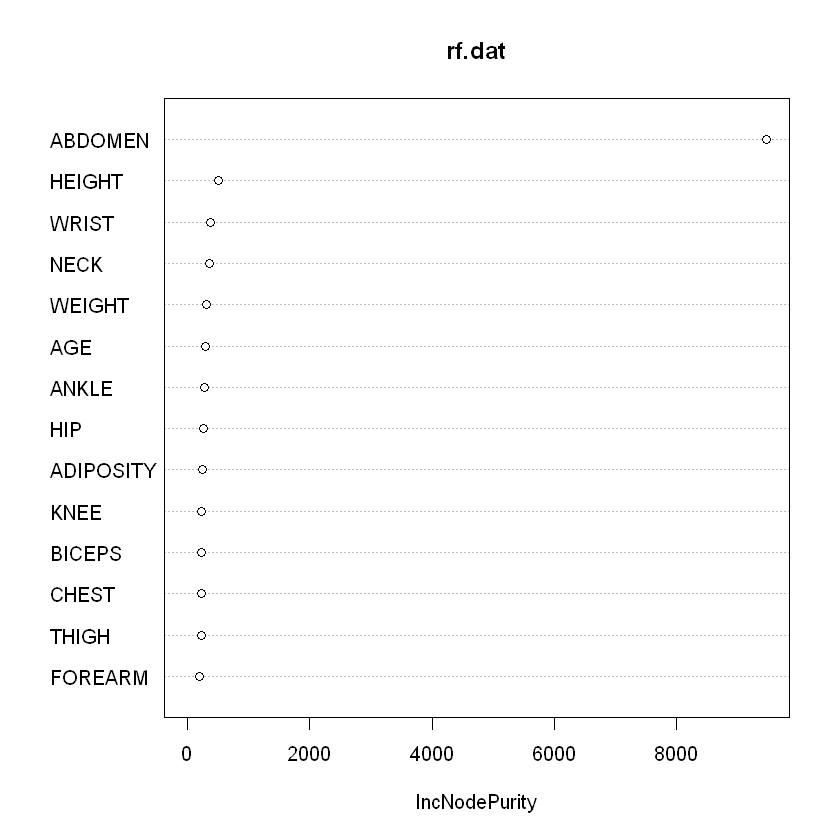

,var,rel.inf
,<fct>,<dbl>
ABDOMEN,ABDOMEN,58.367351
WRIST,WRIST,5.121011
AGE,AGE,4.578762
HEIGHT,HEIGHT,4.152621
NECK,NECK,3.856774
BICEPS,BICEPS,3.826679
ADIPOSITY,ADIPOSITY,3.275572
CHEST,CHEST,2.969118
THIGH,THIGH,2.669201


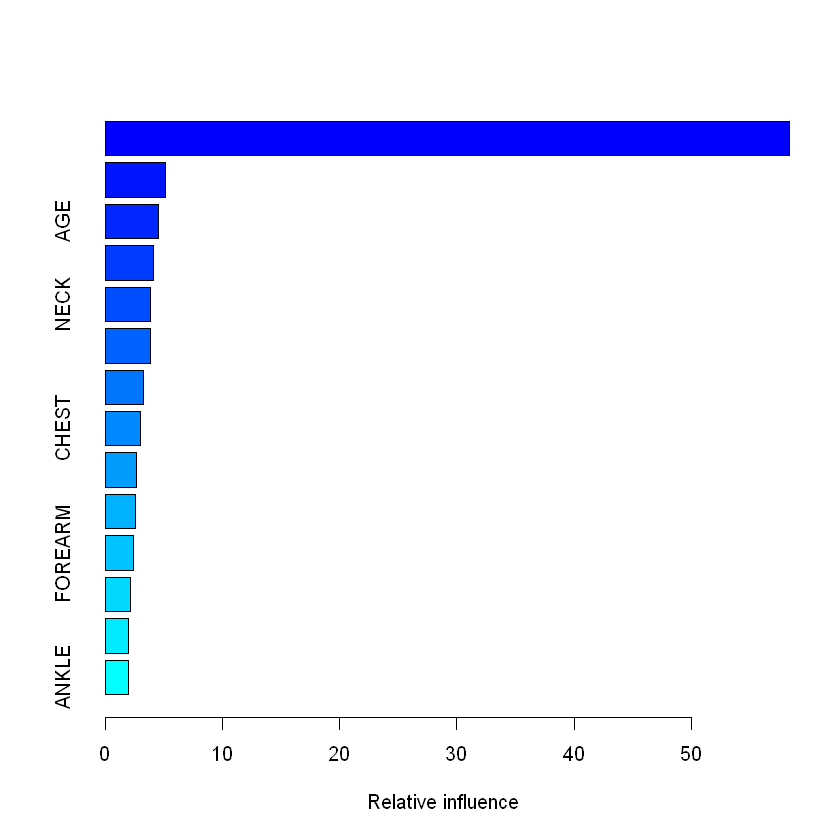

In [69]:
#randomforest
set.seed(628)
rf.dat = randomForest(BODYFAT~.-BODYFAT,data=CleanData, mtry = 14, ntree=1000)
importance(rf.dat)
varImpPlot(rf.dat)

#boosting
set.seed(628)
boost.dat <- gbm(BODYFAT~.-BODYFAT, data=CleanData, n.trees = 1000, interaction.depth = 2, distribution = "gaussian", shrinkage = min.lambda)
summary(boost.dat)

Hence, we analyze our data with Bagging and Boosting with depth 2. We obtained result as above. By the random forest, we figured out variable Abdomen,Height,Wrist play important role on our outcome, Bodyfat. However, we obtained slightly different result from Boosting with depth=2. Abdomen and Wrist are selected as the common variables that play important role on Bodyfat, but Age is judged as another important variable to determine the Bodyfat.

## Variable selection-Simple Linear Regression

Although there is no necessary for transformation on Y variabls in model, we still want to try is there any space for model improvement when we use transformation on X variables. Because all variables is positive, we try use log and square transformation for all variables. 
    
    
The simple model is SLR0=lm(BODYFAT~1,data=ExtendData), without any variable.

SLR_Full uses all variables without transformation.

SLR_Log_Full uses all variables with log transformation.

SLR_sq_Full uses all variables with square transformation.

SLR_All_Full uses all variables without transformation or with both kinds of transformations.

In [139]:
LogAGE=log(CleanData$AGE)
LogWEIGHT=log(CleanData$WEIGHT)
LogHEIGHT=log(CleanData$HEIGHT)
LogADIPOSITY=log(CleanData$ADIPOSITY)
LogNECK=log(CleanData$NECK)
LogCHEST=log(CleanData$CHEST)
LogABDOMEN=log(CleanData$ABDOMEN)
LogHIP=log(CleanData$HIP)
LogTHIGH=log(CleanData$THIGH)
LogKNEE=log(CleanData$KNEE)
LogANKLE=log(CleanData$ANKLE)
LogBICEPS=log(CleanData$BICEPS)
LogFOREARM=log(CleanData$FOREARM)
LogWRIST=log(CleanData$WRIST)

sqAGE=CleanData$AGE^2
sqWEIGHT=CleanData$WEIGHT^2
sqHEIGHT=CleanData$HEIGHT^2
sqADIPOSITY=CleanData$ADIPOSITY^2
sqNECK=CleanData$NECK^2
sqCHEST=CleanData$CHEST^2
sqABDOMEN=CleanData$ABDOMEN^2
sqHIP=CleanData$HIP^2
sqTHIGH=CleanData$THIGH^2
sqKNEE=CleanData$KNEE^2
sqANKLE=CleanData$ANKLE^2
sqBICEPS=CleanData$BICEPS^2
sqFOREARM=CleanData$FOREARM^2
sqWRIST=CleanData$WRIST^2

ExtendData=cbind(CleanData,LogAGE,LogWEIGHT,LogHEIGHT,LogADIPOSITY,LogNECK,LogCHEST,LogABDOMEN,LogHIP,LogTHIGH,LogKNEE,LogANKLE,LogBICEPS,LogFOREARM,LogWRIST
                 ,sqAGE,sqWEIGHT,sqHEIGHT,sqADIPOSITY,sqNECK,sqCHEST,sqABDOMEN,sqHIP,sqTHIGH,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST)

SLR0=lm(BODYFAT~1,data=ExtendData)
SLR_Full=lm(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData)
SLR_Log_Full=lm(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData)
SLR_sq_Full=lm(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData)
SLR_All_Full=lm(BODYFAT~.,data=ExtendData)

### Variable selection-All possible subsets methods

Subsets methods is to find a small subset of variables which are good to predict BODYFAT. The index for subsets method in R can be BIC, Cp and others. 

BIC and AIC are both penalized-likelihood criteria considering both prediction error and model complexity.  Model with small BIC or AIC is better. 

Cp assess the fit of a regression model, a small Cp value indicates that the model is relatively precise.

All possible subsets methods with leaps package. First method to variables selection method is subsets methods, it will choose the best model with BIC, Cp and other index based on the four kinds of full model. 

Although some complex models have better performance, we still do not want to choose them for they are too complex. 

### No transformation

In [140]:
LeapsResults_Full=regsubsets(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Full_Table=cbind(summary(LeapsResults_Full)$which,summary(LeapsResults_Full)$rsq,summary(LeapsResults_Full)$rss,summary(LeapsResults_Full)$adjr2,summary(LeapsResults_Full)$cp,summary(LeapsResults_Full)$bic)
dimnames(LeapsResults_Full_Table)[[2]]=c(dimnames(summary(LeapsResults_Full)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Full_Table

,(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6610804,4575.124,0.6597027,57.058284,-257.3072
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7052744,3978.543,0.7028684,19.801302,-286.4439
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7168079,3822.850,0.7133260,11.556220,-290.8305
4,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7208570,3768.191,0.7162620,9.959454,-288.8885
5,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0.7243308,3721.297,0.7186352,8.873697,-286.4807


We choose:

BODYFAT~ABDOMEN

BODYFAT~ABDOMEN+WEIGHT

BODYFAT~ABDOMEN+WEIGHT+WRIST

### log transformation

In [141]:
LeapsResults_Log=regsubsets(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Log_Table=cbind(summary(LeapsResults_Log)$which,summary(LeapsResults_Log)$rsq,summary(LeapsResults_Log)$rss,summary(LeapsResults_Log)$adjr2,summary(LeapsResults_Log)$cp,summary(LeapsResults_Log)$bic)
dimnames(LeapsResults_Log_Table)[[2]]=c(dimnames(summary(LeapsResults_Log)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Log_Table

,(Intercept),LogAGE,LogWEIGHT,LogHEIGHT,LogADIPOSITY,LogNECK,LogCHEST,LogABDOMEN,LogHIP,LogTHIGH,LogKNEE,LogANKLE,LogBICEPS,LogFOREARM,LogWRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6609432,4576.975,0.6595649,57.938292,-257.2069
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.7031501,4007.218,0.7007269,22.352017,-284.6628
3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7197553,3783.062,0.7163097,9.564668,-293.4252
4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.7247425,3715.740,0.7202115,7.123528,-292.3648
5,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.7280731,3670.780,0.7224548,6.157527,-289.8705


We choose:

BODYFAT~LogABDOMEN

BODYFAT~LogABDOMEN+LogWRIST

BODYFAT~LogABDOMEN+LogHEIGHT+LogWRIST

### Square transformation

In [142]:
LeapsResults_Square=regsubsets(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Square_Table=cbind(summary(LeapsResults_Square)$which,summary(LeapsResults_Square)$rsq,summary(LeapsResults_Square)$rss,summary(LeapsResults_Square)$adjr2,summary(LeapsResults_Square)$cp,summary(LeapsResults_Square)$bic)
dimnames(LeapsResults_Square_Table)[[2]]=c(dimnames(summary(LeapsResults_Square)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Square_Table

,(Intercept),sqAGE,sqWEIGHT,sqHEIGHT,sqADIPOSITY,sqNECK,sqCHEST,sqABDOMEN,sqHIP,sqTHIGH,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6556157,4648.892,0.6542158,52.502614,-253.3404
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7016979,4026.822,0.6992628,14.827472,-283.4526
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7105030,3907.961,0.7069436,9.246628,-285.3697
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0.7146650,3851.777,0.7099682,7.663271,-283.4475
5,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0.7174477,3814.213,0.7116099,7.267455,-280.3646


We choose:

BODYFAT~sqABDOMEN

BODYFAT~sqABDOMEN+sqWEIGHT

BODYFAT~sqABDOMEN+sqWEIGHT+sqWRIST

### All variables

In [143]:
LeapsResults=regsubsets(BODYFAT~.,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Table=cbind(summary(LeapsResults)$which,summary(LeapsResults)$rsq,summary(LeapsResults)$rss,summary(LeapsResults)$adjr2,summary(LeapsResults)$cp,summary(LeapsResults)$bic)
show(LeapsResults_Table)
LeapsResults_Table

  (Intercept) AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE
1           1   0      0      0         0    0     0       1   0     0    0
2           1   0      0      0         0    0     0       1   0     0    0
3           1   0      0      0         0    0     0       0   0     0    0
4           1   0      0      0         0    0     0       0   0     0    0
5           1   1      0      0         0    0     0       0   0     0    0
  ANKLE BICEPS FOREARM WRIST LogAGE LogWEIGHT LogHEIGHT LogADIPOSITY LogNECK
1     0      0       0     0      0         0         0            0       0
2     0      0       0     0      0         0         0            0       0
3     0      0       0     0      0         0         0            0       0
4     0      0       0     0      0         0         0            0       1
5     0      0       0     0      0         0         0            0       1
  LogCHEST LogABDOMEN LogHIP LogTHIGH LogKNEE LogANKLE LogBICEPS LogFOREARM
1     

,(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,⋯,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST,,,,,
1,1,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0.6610804,4575.124,0.6597027,63.41543,-257.3072
2,1,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0.7079455,3942.484,0.7055614,22.90663,-288.7018
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.7200990,3778.424,0.7166576,13.88291,-293.7294
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.7250197,3711.997,0.7204933,11.41954,-292.6147
5,1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.7284200,3666.097,0.7228088,10.33537,-290.1871


We choose:

BODYFAT~ABDOMEN

BODYFAT~ABDOMEN + sqWEIGHT

BODYFAT~LogWRIST + sqHEIGHT + LogABDOMEN

As you can see in the results, the ABDOMEN is the most important variable. WEIGHT, WRIST are also very important. 

### Variable selection-Forward directions

The forward direction model selection will find the best AIC or BIC model from the simplest model (lm(BODYFAT~1)) to four kinds of full models until no improvement space for AIC or BIC.

### No transformation with AIC

In [168]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

            Df Sum of Sq     RSS    AIC
+ ABDOMEN    1    8924.0  4575.1 726.91
+ ADIPOSITY  1    7096.0  6403.1 810.27
+ CHEST      1    6216.5  7282.6 842.20
+ HIP        1    5117.7  8381.5 877.05
+ WEIGHT     1    4870.1  8629.1 884.27
+ THIGH      1    3944.0  9555.2 909.55
+ KNEE       1    3527.3  9971.8 920.13
+ BICEPS     1    2960.0 10539.1 933.86
+ NECK       1    2794.3 10704.8 937.72
+ FOREARM    1    1626.5 11872.7 963.40
+ WRIST      1    1271.2 12228.0 970.72
+ AGE        1    1129.7 12369.5 973.57
+ ANKLE      1     667.3 12831.9 982.67
<none>                   13499.1 993.24
+ HEIGHT     1       0.1 13499.1 995.24

Step:  AIC=726.91
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    596.58 3978.5 694.26
+ WRIST      1    530.01 4045.1 698.38
+ HEIGHT     1    476.40 4098.7 701.64
+ NECK       1    407.29 4167.8 705.79
+ HIP        1    251.67 4323.5 714.88
+ KNEE       1    245.93 4329.2 715.21
+ CHEST      1   


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS + NECK + 
    AGE + ADIPOSITY + CHEST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST       BICEPS         NECK  
  -12.02290      0.78669     -0.05785     -1.42026      0.22855     -0.32645  
        AGE    ADIPOSITY        CHEST  
    0.05116      0.47492     -0.14718  


AIC=683.68

BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS + NECK + AGE + ADIPOSITY + CHEST

### Log transformation with AIC

In [169]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

               Df Sum of Sq     RSS    AIC
+ LogABDOMEN    1    8922.2  4577.0 727.01
+ LogADIPOSITY  1    7090.5  6408.6 810.49
+ LogCHEST      1    6227.2  7271.9 841.83
+ LogHIP        1    5144.5  8354.7 876.25
+ LogWEIGHT     1    4955.9  8543.3 881.79
+ LogTHIGH      1    4012.7  9486.4 907.76
+ LogKNEE       1    3532.0  9967.1 920.02
+ LogBICEPS     1    3047.6 10451.6 931.79
+ LogNECK       1    2772.2 10727.0 938.24
+ LogFOREARM    1    1590.8 11908.3 964.15
+ LogWRIST      1    1261.5 12237.7 970.91
+ LogAGE        1    1123.3 12375.8 973.70
+ LogANKLE      1     751.8 12747.3 981.03
<none>                      13499.1 993.24
+ LogHEIGHT     1       0.2 13499.0 995.24

Step:  AIC=727.01
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWRIST      1    569.76 4007.2 696.04
+ LogWEIGHT     1    552.07 4024.9 697.13
+ LogHEIGHT     1    508.83 4068.1 699.78
+ LogNECK       1    433.80 4143.2 704.32
+ LogKNEE       1    252.01 4


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT + LogNECK + 
    LogAGE + LogFOREARM, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN     LogWRIST    LogHEIGHT      LogNECK       LogAGE  
    -91.450       68.874      -27.371      -22.327      -16.644        2.010  
 LogFOREARM  
      7.857  


AIC=679.57

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT + LogNECK + LogAGE + LogFOREARM

### Square transformation with AIC

In [170]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

              Df Sum of Sq     RSS    AIC
+ sqABDOMEN    1    8850.2  4648.9 730.88
+ sqADIPOSITY  1    7024.0  6475.1 813.05
+ sqCHEST      1    6176.9  7322.2 843.54
+ sqHIP        1    5074.5  8424.6 878.32
+ sqWEIGHT     1    4709.9  8789.3 888.83
+ sqTHIGH      1    3854.1  9645.1 911.87
+ sqKNEE       1    3510.9  9988.2 920.54
+ sqBICEPS     1    2851.5 10647.7 936.40
+ sqNECK       1    2803.5 10695.7 937.51
+ sqFOREARM    1    1636.6 11862.5 963.19
+ sqWRIST      1    1279.0 12220.1 970.56
+ sqAGE        1    1101.4 12397.8 974.14
+ sqANKLE      1     566.3 12932.9 984.62
<none>                     13499.1 993.24
+ sqHEIGHT     1       0.0 13499.1 995.24

Step:  AIC=730.88
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1    622.07 4026.8 697.25
+ sqWRIST      1    468.04 4180.9 706.56
+ sqHEIGHT     1    438.81 4210.1 708.29
+ sqNECK       1    353.57 4295.3 713.26
+ sqHIP        1    244.78 4404.1 719.46
+ sqKNEE  


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS, 
    data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqWRIST     sqBICEPS  
 -5.3667833    0.0047368   -0.0003115   -0.0322996    0.0041063  


AIC=690.23

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS


### All transformation with AIC

In [172]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

               Df Sum of Sq     RSS    AIC
+ ABDOMEN       1    8924.0  4575.1 726.91
+ LogABDOMEN    1    8922.2  4577.0 727.01
+ sqABDOMEN     1    8850.2  4648.9 730.88
+ ADIPOSITY     1    7096.0  6403.1 810.27
+ LogADIPOSITY  1    7090.5  6408.6 810.49
+ sqADIPOSITY   1    7024.0  6475.1 813.05
+ LogCHEST      1    6227.2  7271.9 841.83
+ CHEST         1    6216.5  7282.6 842.20
+ sqCHEST       1    6176.9  7322.2 843.54
+ LogHIP        1    5144.5  8354.7 876.25
+ HIP           1    5117.7  8381.5 877.05
+ sqHIP         1    5074.5  8424.6 878.32
+ LogWEIGHT     1    4955.9  8543.3 881.79
+ WEIGHT        1    4870.1  8629.1 884.27
+ sqWEIGHT      1    4709.9  8789.3 888.83
+ LogTHIGH      1    4012.7  9486.4 907.76
+ THIGH         1    3944.0  9555.2 909.55
+ sqTHIGH       1    3854.1  9645.1 911.87
+ LogKNEE       1    3532.0  9967.1 920.02
+ KNEE          1    3527.3  9971.8 920.13
+ sqKNEE        1    3510.9  9988.2 920.54
+ LogBICEPS     1    3


Call:
lm(formula = BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST + LogADIPOSITY + 
    LogNECK + LogBICEPS + sqBICEPS + AGE + CHEST + sqNECK + sqFOREARM, 
    data = ExtendData)

Coefficients:
 (Intercept)       ABDOMEN      sqWEIGHT      LogWRIST  LogADIPOSITY  
   1.191e+02     7.854e-01    -1.535e-04    -3.109e+01     1.076e+01  
     LogNECK     LogBICEPS      sqBICEPS           AGE         CHEST  
  -1.027e+02     7.441e+01    -3.350e-02     5.816e-02    -1.403e-01  
      sqNECK     sqFOREARM  
   3.160e-02     4.699e-03  


AIC=677.02

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST + LogADIPOSITY + LogNECK + LogBICEPS + sqBICEPS + AGE + CHEST + sqNECK + sqFOREARM

### No transformation with BIC

In [173]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

            Df Sum of Sq     RSS     AIC
+ ABDOMEN    1    8924.0  4575.1  733.94
+ ADIPOSITY  1    7096.0  6403.1  817.30
+ CHEST      1    6216.5  7282.6  849.22
+ HIP        1    5117.7  8381.5  884.07
+ WEIGHT     1    4870.1  8629.1  891.29
+ THIGH      1    3944.0  9555.2  916.58
+ KNEE       1    3527.3  9971.8  927.16
+ BICEPS     1    2960.0 10539.1  940.88
+ NECK       1    2794.3 10704.8  944.75
+ FOREARM    1    1626.5 11872.7  970.43
+ WRIST      1    1271.2 12228.0  977.74
+ AGE        1    1129.7 12369.5  980.60
+ ANKLE      1     667.3 12831.9  989.70
<none>                   13499.1  996.76
+ HEIGHT     1       0.1 13499.1 1002.27

Step:  AIC=733.94
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    596.58 3978.5 704.80
+ WRIST      1    530.01 4045.1 708.92
+ HEIGHT     1    476.40 4098.7 712.18
+ NECK       1    407.29 4167.8 716.33
+ HIP        1    251.67 4323.5 725.42
+ KNEE       1    245.93 4329.2 725.75
+


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST  
  -24.22925      0.87792     -0.08384     -1.26116  


BIC=700.41

BODYFAT ~ ABDOMEN + WEIGHT + WRIST

### Log transformation with BIC

In [174]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ LogABDOMEN    1    8922.2  4577.0  734.04
+ LogADIPOSITY  1    7090.5  6408.6  817.52
+ LogCHEST      1    6227.2  7271.9  848.86
+ LogHIP        1    5144.5  8354.7  883.28
+ LogWEIGHT     1    4955.9  8543.3  888.82
+ LogTHIGH      1    4012.7  9486.4  914.79
+ LogKNEE       1    3532.0  9967.1  927.04
+ LogBICEPS     1    3047.6 10451.6  938.81
+ LogNECK       1    2772.2 10727.0  945.26
+ LogFOREARM    1    1590.8 11908.3  971.17
+ LogWRIST      1    1261.5 12237.7  977.94
+ LogAGE        1    1123.3 12375.8  980.72
+ LogANKLE      1     751.8 12747.3  988.06
<none>                      13499.1  996.76
+ LogHEIGHT     1       0.2 13499.0 1002.27

Step:  AIC=734.04
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWRIST      1    569.76 4007.2 706.58
+ LogWEIGHT     1    552.07 4024.9 707.67
+ LogHEIGHT     1    508.83 4068.1 710.32
+ LogNECK       1    433.80 4143.2 714.86
+ LogKNEE    


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN     LogWRIST    LogHEIGHT  
     -79.24        67.16       -28.93       -28.56  


BIC=697.82

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT

### Square transformation with BIC

In [175]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

              Df Sum of Sq     RSS     AIC
+ sqABDOMEN    1    8850.2  4648.9  737.90
+ sqADIPOSITY  1    7024.0  6475.1  820.08
+ sqCHEST      1    6176.9  7322.2  850.57
+ sqHIP        1    5074.5  8424.6  885.35
+ sqWEIGHT     1    4709.9  8789.3  895.86
+ sqTHIGH      1    3854.1  9645.1  918.90
+ sqKNEE       1    3510.9  9988.2  927.57
+ sqBICEPS     1    2851.5 10647.7  943.42
+ sqNECK       1    2803.5 10695.7  944.54
+ sqFOREARM    1    1636.6 11862.5  970.22
+ sqWRIST      1    1279.0 12220.1  977.58
+ sqAGE        1    1101.4 12397.8  981.16
+ sqANKLE      1     566.3 12932.9  991.64
<none>                     13499.1  996.76
+ sqHEIGHT     1       0.0 13499.1 1002.27

Step:  AIC=737.9
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1    622.07 4026.8 707.79
+ sqWRIST      1    468.04 4180.9 717.10
+ sqHEIGHT     1    438.81 4210.1 718.83
+ sqNECK       1    353.57 4295.3 723.80
+ sqHIP        1    244.78 4404.1 73


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqWRIST  
  -3.621745     0.004695    -0.000248    -0.029718  


BIC=705.87

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST

### All transformation with BIC

In [176]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ ABDOMEN       1    8924.0  4575.1  733.94
+ LogABDOMEN    1    8922.2  4577.0  734.04
+ sqABDOMEN     1    8850.2  4648.9  737.90
+ ADIPOSITY     1    7096.0  6403.1  817.30
+ LogADIPOSITY  1    7090.5  6408.6  817.52
+ sqADIPOSITY   1    7024.0  6475.1  820.08
+ LogCHEST      1    6227.2  7271.9  848.86
+ CHEST         1    6216.5  7282.6  849.22
+ sqCHEST       1    6176.9  7322.2  850.57
+ LogHIP        1    5144.5  8354.7  883.28
+ HIP           1    5117.7  8381.5  884.07
+ sqHIP         1    5074.5  8424.6  885.35
+ LogWEIGHT     1    4955.9  8543.3  888.82
+ WEIGHT        1    4870.1  8629.1  891.29
+ sqWEIGHT      1    4709.9  8789.3  895.86
+ LogTHIGH      1    4012.7  9486.4  914.79
+ THIGH         1    3944.0  9555.2  916.58
+ sqTHIGH       1    3854.1  9645.1  918.90
+ LogKNEE       1    3532.0  9967.1  927.04
+ KNEE          1    3527.3  9971.8  927.16
+ sqKNEE        1    3510.9  9988.2  927.57



Call:
lm(formula = BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN     sqWEIGHT     LogWRIST  
  1.132e+01    8.856e-01   -2.402e-04   -2.288e+01  


BIC=697.68

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST

As you can see, the BIC can give more simple and better model. 

### Variable selection-Backward directions

### No transformation with AIC

In [177]:
step(SLR_Full,direction='backward', k=2)

Start:  AIC=689.36
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.36 3541.2 687.38
- ANKLE      1      5.02 3545.9 687.71
- BICEPS     1     12.75 3553.6 688.25
- FOREARM    1     21.69 3562.5 688.87
- THIGH      1     21.86 3562.7 688.88
- HEIGHT     1     27.71 3568.6 689.29
- HIP        1     27.89 3568.7 689.30
<none>                   3540.9 689.36
- CHEST      1     32.31 3573.2 689.61
- WEIGHT     1     39.61 3580.5 690.12
- ADIPOSITY  1     42.64 3583.5 690.33
- NECK       1     51.46 3592.3 690.93
- AGE        1     74.61 3615.5 692.53
- WRIST      1    155.24 3696.1 698.00
- ABDOMEN    1   1400.10 4941.0 769.99

Step:  AIC=687.38
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      4.68 3545.9 685.71



Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + FOREARM + WRIST, data = ExtendData)

Coefficients:
(Intercept)          AGE       WEIGHT       HEIGHT    ADIPOSITY         NECK  
  -79.94361      0.06466     -0.24043      1.06998      1.92873     -0.39589  
      CHEST      ABDOMEN          HIP        THIGH      FOREARM        WRIST  
   -0.14711      0.79697     -0.20469      0.18730      0.27292     -1.51314  


AIC=684.58

BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST +  ABDOMEN + HIP + THIGH + FOREARM + WRIST

### Log transformation with AIC

In [179]:
step(SLR_Log_Full,direction='backward', k=2)

Start:  AIC=688.73
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST

               Df Sum of Sq    RSS    AIC
- LogKNEE       1      1.40 3533.4 686.83
- LogANKLE      1      4.23 3536.2 687.03
- LogTHIGH      1      5.85 3537.8 687.14
- LogBICEPS     1     11.52 3543.5 687.54
- LogFOREARM    1     14.95 3546.9 687.78
- LogHIP        1     19.86 3551.8 688.12
- LogADIPOSITY  1     21.62 3553.6 688.25
- LogWEIGHT     1     23.85 3555.8 688.40
- LogHEIGHT     1     25.59 3557.6 688.52
<none>                      3532.0 688.73
- LogCHEST      1     37.76 3569.7 689.37
- LogAGE        1     64.71 3596.7 691.24
- LogNECK       1     80.30 3612.3 692.31
- LogWRIST      1    165.76 3697.7 698.11
- LogABDOMEN    1   1339.90 4871.9 766.50

Step:  AIC=686.83
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHI


Call:
lm(formula = BODYFAT ~ LogAGE + LogHEIGHT + LogNECK + LogABDOMEN + 
    LogBICEPS + LogWRIST, data = ExtendData)

Coefficients:
(Intercept)       LogAGE    LogHEIGHT      LogNECK   LogABDOMEN    LogBICEPS  
    -85.336        2.025      -22.201      -16.190       67.599        6.405  
   LogWRIST  
    -26.842  


AIC=679.98

BODYFAT ~ LogAGE + LogHEIGHT + LogNECK + LogABDOMEN + LogBICEPS + LogWRIST

### Square transformation with AIC

In [180]:
step(SLR_sq_Full,direction='backward', k=2)

Start:  AIC=697.1
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + sqANKLE + 
    sqBICEPS + sqFOREARM + sqWRIST

              Df Sum of Sq    RSS    AIC
- sqKNEE       1      0.03 3653.3 695.11
- sqANKLE      1      9.80 3663.0 695.77
- sqBICEPS     1     15.70 3668.9 696.17
- sqCHEST      1     22.98 3676.2 696.66
- sqHEIGHT     1     24.43 3677.7 696.76
- sqHIP        1     25.60 3678.8 696.84
- sqFOREARM    1     26.00 3679.2 696.86
- sqNECK       1     28.87 3682.1 697.06
<none>                     3653.2 697.10
- sqTHIGH      1     34.90 3688.1 697.46
- sqADIPOSITY  1     36.38 3689.6 697.56
- sqWEIGHT     1     67.09 3720.3 699.62
- sqAGE        1     69.47 3722.7 699.78
- sqWRIST      1    139.83 3793.1 704.42
- sqABDOMEN    1   1476.74 5130.0 779.30

Step:  AIC=695.11
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + sqANKLE + sqBICEPS + 
    sqFOREARM


Call:
lm(formula = BODYFAT ~ sqAGE + sqWEIGHT + sqABDOMEN + sqTHIGH + 
    sqFOREARM + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)        sqAGE     sqWEIGHT    sqABDOMEN      sqTHIGH    sqFOREARM  
 -7.6458254    0.0006114   -0.0003007    0.0043403    0.0018836    0.0053776  
    sqWRIST  
 -0.0407208  


AIC=688.77

BODYFAT ~ sqAGE + sqWEIGHT + sqABDOMEN + sqTHIGH + sqFOREARM + 
    sqWRIST

### All transformation with AIC

In [181]:
step(SLR_All_Full,direction='backward', k=2)

Start:  AIC=708.42
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST + LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST + sqAGE + sqWEIGHT + sqHEIGHT + 
    sqADIPOSITY + sqNECK + sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + 
    sqKNEE + sqANKLE + sqBICEPS + sqFOREARM + sqWRIST

               Df Sum of Sq    RSS    AIC
- FOREARM       1     0.001 3050.9 706.42
- LogFOREARM    1     0.016 3050.9 706.42
- sqADIPOSITY   1     0.038 3051.0 706.43
- sqFOREARM     1     0.046 3051.0 706.43
- LogKNEE       1     0.130 3051.1 706.43
- LogCHEST      1     0.245 3051.2 706.44
- ADIPOSITY     1     0.249 3051.2 706.44
- KNEE          1     0.263 3051.2 706.44
- CHEST         1     0.312 3051.2 706.45
- sqCHEST       1     0.355 3051.3 706.45
- sqKNEE        1     0.443 3051.4 706.46
- sqWEIGHT      1


Call:
lm(formula = BODYFAT ~ ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + 
    BICEPS + WRIST + LogAGE + LogABDOMEN + LogHIP + sqABDOMEN + 
    sqHIP + sqBICEPS + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)    ADIPOSITY         NECK        CHEST      ABDOMEN          HIP  
 -1.295e+04    5.720e-01   -4.398e-01   -1.715e-01    2.932e+01   -1.064e+02  
     BICEPS        WRIST       LogAGE   LogABDOMEN       LogHIP    sqABDOMEN  
  4.230e+00   -2.394e+01    2.424e+00   -1.333e+03    5.468e+03   -7.581e-02  
      sqHIP     sqBICEPS      sqWRIST  
  2.568e-01   -6.173e-02    6.042e-01  


AIC=671.38

BODYFAT ~ ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + BICEPS + 
    WRIST + LogAGE + LogABDOMEN + LogHIP + sqABDOMEN + sqHIP + 
    sqBICEPS + sqWRIST

### No transformation with BIC

In [161]:
step(SLR_Full,direction='backward', k=log(n))

Start:  AIC=742.06
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.36 3541.2 736.57
- ANKLE      1      5.02 3545.9 736.90
- BICEPS     1     12.75 3553.6 737.44
- FOREARM    1     21.69 3562.5 738.06
- THIGH      1     21.86 3562.7 738.07
- HEIGHT     1     27.71 3568.6 738.48
- HIP        1     27.89 3568.7 738.49
- CHEST      1     32.31 3573.2 738.80
- WEIGHT     1     39.61 3580.5 739.30
- ADIPOSITY  1     42.64 3583.5 739.51
- NECK       1     51.46 3592.3 740.12
- AGE        1     74.61 3615.5 741.72
<none>                   3540.9 742.06
- WRIST      1    155.24 3696.1 747.19
- ABDOMEN    1   1400.10 4941.0 819.18

Step:  AIC=736.57
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      4.68 3545.9 731.38



Call:
lm(formula = BODYFAT ~ AGE + ABDOMEN + WRIST, data = ExtendData)

Coefficients:
(Intercept)          AGE      ABDOMEN        WRIST  
  -10.53395      0.06849      0.70618     -2.13185  


BIC=703.55

BODYFAT ~ AGE + ABDOMEN + WRIST

### Log transformation with BIC

In [182]:
step(SLR_Log_Full,direction='backward', k=log(n))

Start:  AIC=741.43
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST

               Df Sum of Sq    RSS    AIC
- LogKNEE       1      1.40 3533.4 736.02
- LogANKLE      1      4.23 3536.2 736.22
- LogTHIGH      1      5.85 3537.8 736.33
- LogBICEPS     1     11.52 3543.5 736.73
- LogFOREARM    1     14.95 3546.9 736.97
- LogHIP        1     19.86 3551.8 737.31
- LogADIPOSITY  1     21.62 3553.6 737.43
- LogWEIGHT     1     23.85 3555.8 737.59
- LogHEIGHT     1     25.59 3557.6 737.71
- LogCHEST      1     37.76 3569.7 738.56
- LogAGE        1     64.71 3596.7 740.42
<none>                      3532.0 741.43
- LogNECK       1     80.30 3612.3 741.50
- LogWRIST      1    165.76 3697.7 747.29
- LogABDOMEN    1   1339.90 4871.9 815.68

Step:  AIC=736.02
BODYFAT ~ LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHI


Call:
lm(formula = BODYFAT ~ LogHEIGHT + LogABDOMEN + LogWRIST, data = ExtendData)

Coefficients:
(Intercept)    LogHEIGHT   LogABDOMEN     LogWRIST  
     -79.24       -28.56        67.16       -28.93  


BIC=697.82

BODYFAT ~ LogHEIGHT + LogABDOMEN + LogWRIST

### Square transformation with BIC

In [164]:
step(SLR_sq_Full,direction='backward', k=log(n))

Start:  AIC=749.81
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + sqKNEE + sqANKLE + 
    sqBICEPS + sqFOREARM + sqWRIST

              Df Sum of Sq    RSS    AIC
- sqKNEE       1      0.03 3653.3 744.29
- sqANKLE      1      9.80 3663.0 744.96
- sqBICEPS     1     15.70 3668.9 745.36
- sqCHEST      1     22.98 3676.2 745.85
- sqHEIGHT     1     24.43 3677.7 745.95
- sqHIP        1     25.60 3678.8 746.02
- sqFOREARM    1     26.00 3679.2 746.05
- sqNECK       1     28.87 3682.1 746.24
- sqTHIGH      1     34.90 3688.1 746.65
- sqADIPOSITY  1     36.38 3689.6 746.75
- sqWEIGHT     1     67.09 3720.3 748.81
- sqAGE        1     69.47 3722.7 748.96
<none>                     3653.2 749.81
- sqWRIST      1    139.83 3793.1 753.61
- sqABDOMEN    1   1476.74 5130.0 828.49

Step:  AIC=744.29
BODYFAT ~ sqAGE + sqWEIGHT + sqHEIGHT + sqADIPOSITY + sqNECK + 
    sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + sqANKLE + sqBICEPS + 
    sqFOREAR


Call:
lm(formula = BODYFAT ~ sqWEIGHT + sqABDOMEN + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)     sqWEIGHT    sqABDOMEN      sqWRIST  
  -3.621745    -0.000248     0.004695    -0.029718  


BIC=705.87

BODYFAT ~ sqWEIGHT + sqABDOMEN + sqWRIST

### All transformation with BIC

In [184]:
step(SLR_All_Full,direction='backward', k=log(n))

Start:  AIC=859.5
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST + LogAGE + LogWEIGHT + LogHEIGHT + LogADIPOSITY + LogNECK + 
    LogCHEST + LogABDOMEN + LogHIP + LogTHIGH + LogKNEE + LogANKLE + 
    LogBICEPS + LogFOREARM + LogWRIST + sqAGE + sqWEIGHT + sqHEIGHT + 
    sqADIPOSITY + sqNECK + sqCHEST + sqABDOMEN + sqHIP + sqTHIGH + 
    sqKNEE + sqANKLE + sqBICEPS + sqFOREARM + sqWRIST

               Df Sum of Sq    RSS    AIC
- FOREARM       1     0.001 3050.9 853.99
- LogFOREARM    1     0.016 3050.9 853.99
- sqADIPOSITY   1     0.038 3051.0 853.99
- sqFOREARM     1     0.046 3051.0 853.99
- LogKNEE       1     0.130 3051.1 854.00
- LogCHEST      1     0.245 3051.2 854.01
- ADIPOSITY     1     0.249 3051.2 854.01
- KNEE          1     0.263 3051.2 854.01
- CHEST         1     0.312 3051.2 854.01
- sqCHEST       1     0.355 3051.3 854.02
- sqKNEE        1     0.443 3051.4 854.02
- sqWEIGHT      1 


Call:
lm(formula = BODYFAT ~ ABDOMEN + HIP + WRIST + LogABDOMEN + LogHIP + 
    sqABDOMEN + sqHIP, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN          HIP        WRIST   LogABDOMEN       LogHIP  
 -1.482e+04    2.775e+01   -1.162e+02   -2.059e+00   -1.252e+03    5.950e+03  
  sqABDOMEN        sqHIP  
 -7.164e-02    2.817e-01  


BIC=713.94

BODYFAT ~ ABDOMEN + HIP + WRIST + LogABDOMEN + LogHIP + sqABDOMEN + 
    sqHIP

## Variable selection-Stepwise directions

### With AIC

In [185]:
step(SLR_Full,scope=list(upper=SLR_All_Full),direction='both', k=2)

Start:  AIC=689.36
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

               Df Sum of Sq    RSS    AIC
+ sqBICEPS      1     76.34 3464.5 685.95
+ LogBICEPS     1     73.70 3467.2 686.14
- KNEE          1      0.36 3541.2 687.38
+ LogTHIGH      1     56.29 3484.6 687.38
+ LogHIP        1     55.84 3485.0 687.41
+ sqHIP         1     52.24 3488.6 687.67
- ANKLE         1      5.02 3545.9 687.71
+ sqTHIGH       1     48.46 3492.4 687.94
- BICEPS        1     12.75 3553.6 688.25
+ LogWEIGHT     1     41.99 3498.9 688.40
+ sqWEIGHT      1     35.40 3505.5 688.86
- FOREARM       1     21.69 3562.5 688.87
- THIGH         1     21.86 3562.7 688.88
- HEIGHT        1     27.71 3568.6 689.29
- HIP           1     27.89 3568.7 689.30
<none>                      3540.9 689.36
+ sqADIPOSITY   1     28.15 3512.7 689.38
+ sqWRIST       1     26.48 3514.4 689.49
+ LogADIPOSITY  1     25.68 3515.2 689.55
- CHE


Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + 
    HIP + BICEPS + WRIST + sqBICEPS + sqWRIST + LogHIP, data = ExtendData)

Coefficients:
(Intercept)          AGE    ADIPOSITY         NECK        CHEST      ABDOMEN  
 -730.52360      0.05723      0.64436     -0.44851     -0.19859      0.75480  
        HIP       BICEPS        WRIST     sqBICEPS      sqWRIST       LogHIP  
   -2.47460      3.92852    -19.69524     -0.05752      0.49098    233.39607  


AIC=674.73

BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + BICEPS + 
    WRIST + sqBICEPS + sqWRIST + LogHIP

### With BIC

In [186]:
step(SLR_Full,scope=list(upper=SLR_All_Full),direction='both', k=log(n))


Start:  AIC=742.06
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

               Df Sum of Sq    RSS    AIC
- KNEE          1      0.36 3541.2 736.57
- ANKLE         1      5.02 3545.9 736.90
- BICEPS        1     12.75 3553.6 737.44
- FOREARM       1     21.69 3562.5 738.06
- THIGH         1     21.86 3562.7 738.07
- HEIGHT        1     27.71 3568.6 738.48
- HIP           1     27.89 3568.7 738.49
- CHEST         1     32.31 3573.2 738.80
- WEIGHT        1     39.61 3580.5 739.30
- ADIPOSITY     1     42.64 3583.5 739.51
- NECK          1     51.46 3592.3 740.12
- AGE           1     74.61 3615.5 741.72
<none>                      3540.9 742.06
+ sqBICEPS      1     76.34 3464.5 742.17
+ LogBICEPS     1     73.70 3467.2 742.35
+ LogTHIGH      1     56.29 3484.6 743.60
+ LogHIP        1     55.84 3485.0 743.63
+ sqHIP         1     52.24 3488.6 743.89
+ sqTHIGH       1     48.46 3492.4 744.15
+ Log


Call:
lm(formula = BODYFAT ~ ABDOMEN + WRIST + sqWEIGHT, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN        WRIST     sqWEIGHT  
  -32.15926      0.88560     -1.25733     -0.00024  


BIC=697.74

BODYFAT ~ ABDOMEN + WRIST + sqWEIGHT

## Model selection-Cross Validation

The BIC also gives simple model than AIC. 

Note from the results, we consider the ABDOMEN as the most important variables and WEIGHT as the second one, WRIST is the third. 

From results above, we choose some of alternative models in the following tables, note that some of them are choosen from AIC or BIC, some of them are simplified version, such as cut a variables, we prefer simple and precise models. Most of them has three variables: WRIST, ABDOMEN and WEIGHT and their transformation, but our groups also choose some models with many variables, in the following you can see there is no necessary to choose models with too many variables.

Therefore, we will use cross validation method to select the best model for our final model. We will use 30-repeated 10-fold cross-validation, because there is only more than 240 data, if we use only 10-fold cross-validation without repeat, the output will vibrate. The 10-fold cross validation sample the dataset into train and test part which build the model with train part dataset and calculate the R square and sum of residual with test part. Cross validation methods help us know model's ability to predict new data that was not used in trainning.

In [190]:
set.seed(1) 
train.control <- trainControl(method = "repeatedcv", number = 10, repeats=30)

model1=train(BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable    =model1$results[c(2,3)]

model2=train(BODYFAT ~ LogWRIST + sqHEIGHT + LogABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[2,]=model2$results[c(2,3)]

model3=train(BODYFAT ~ ABDOMEN + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[3,]=model3$results[c(2,3)]

model4=train(BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[4,]=model4$results[c(2,3)]

model5=train(BODYFAT ~ sqABDOMEN + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[5,]=model5$results[c(2,3)]

model6=train(BODYFAT ~ sqABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[6,]=model6$results[c(2,3)]

model7=train(BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[7,]=model7$results[c(2,3)]

model8=train(BODYFAT ~ LogABDOMEN + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[8,]=model8$results[c(2,3)]

model9=train(BODYFAT ~ LogABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[9,]=model9$results[c(2,3)]

model10=train(BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[10,]=model10$results[c(2,3)]

model11=train(BODYFAT ~ ABDOMEN + WEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[11,]=model11$results[c(2,3)]

model12=train(BODYFAT ~ ABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[12,]=model12$results[c(2,3)]

model13=train(BODYFAT ~ ABDOMEN + WRIST + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[13,]=model13$results[c(2,3)]

model14=train(BODYFAT ~ ABDOMEN + HIP + WRIST + LogABDOMEN + LogHIP + sqABDOMEN + sqHIP, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[14,]=model14$results[c(2,3)]

model15=train(BODYFAT ~ sqAGE + sqWEIGHT + sqABDOMEN + sqTHIGH + sqFOREARM + sqWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[15,]=model15$results[c(2,3)]

model16=train(BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[16,]=model16$results[c(2,3)]

model17=train(BODYFAT ~ AGE + ABDOMEN + WRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[17,]=model17$results[c(2,3)]

model18=train(BODYFAT ~ ABDOMEN + HIP + WRIST + LogABDOMEN + LogHIP + sqABDOMEN + sqHIP, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[18,]=model18$results[c(2,3)]

ColModel=c("BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST",
           "BODYFAT ~ LogWRIST + sqHEIGHT + LogABDOMEN",
           "BODYFAT ~ ABDOMEN + sqWEIGHT",
           "BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST",
           "BODYFAT ~ sqABDOMEN + sqWEIGHT",
           "BODYFAT ~ sqABDOMEN",
           "BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT",
           "BODYFAT ~ LogABDOMEN + LogWRIST",
           "BODYFAT ~ LogABDOMEN",
           "BODYFAT ~ ABDOMEN + WEIGHT + WRIST",
           "BODYFAT ~ ABDOMEN + WEIGHT",
           "BODYFAT ~ ABDOMEN",
           "BODYFAT ~ ABDOMEN + WRIST + sqWEIGHT",
           "ABDOMEN + HIP + WRIST + LogABDOMEN + LogHIP + sqABDOMEN + sqHIP",
           "BODYFAT ~ sqAGE + sqWEIGHT + sqABDOMEN + sqTHIGH + sqFOREARM + sqWRIST",
           "BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS",
           "BODYFAT ~ AGE + ABDOMEN + WRIST",
           "BODYFAT ~ ABDOMEN + HIP + WRIST + LogABDOMEN + LogHIP + sqABDOMEN + sqHIP")

In [191]:
CrossValidationTable=cbind(ColModel,CrossValidationTable)
colnames(CrossValidationTable)=c("Model","Root Mean Squared Error, RMSE","R-squared, R2")
CrossValidationTable

,Model,"Root Mean Squared Error, RMSE","R-squared, R2"
,<chr>,<dbl>,<dbl>
1,BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST,3.937862,0.7247008
2,BODYFAT ~ LogWRIST + sqHEIGHT + LogABDOMEN,3.941071,0.7226578
3,BODYFAT ~ ABDOMEN + sqWEIGHT,4.001342,0.7149690
4,BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST,4.000357,0.7161659
5,BODYFAT ~ sqABDOMEN + sqWEIGHT,4.040667,0.7083916
6,BODYFAT ~ sqABDOMEN,4.322792,0.6614911
7,BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT,3.945733,0.7225947
8,BODYFAT ~ LogABDOMEN + LogWRIST,4.030833,0.7094928
9,BODYFAT ~ LogABDOMEN,4.287261,0.6685336


Root Mean Square Error measures the differences between predicted and estimator. The smaller the better. 

R square measures the proportion of the variance in variables our model explains. The larger the better. 

It seems that 

1. There is improvement from model with 1 variable to that with 2 variables. Therefore we decide to choose model with 2 and 3 variables. 

2. Three variables models with AGE has bad performance.

3. There is almost no difference between model with and without transformation, with rule that we prefer simple model, we decide to choose from model without transformation.

4. When variables larger than 3, there is almost no obvious improvement between them with three variables model, in fact some of them works worse than three variables models. So we decide to choose models with three variables. 

Therefore, we study model 10 and 11. They has 2 or 3 variables, with no transformation, with as few variables as possible, with ABDOMEN, WEIGHT and WRIST, performs well in Rsquared and residual. 

In [56]:
anova(lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData),lm(BODYFAT ~ ABDOMEN + WEIGHT,data=CleanData))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,244,3822.850,NA,NA,NA,NA
2,245,3978.543,-1,-155.6925,9.937342,0.001822296


From ANOVA results:

The p-value is smaller than 0.05, we reject the H0: coefficient of WRIST is 0 and hold that it is necessary to put WRIST into our model

In [57]:
summary(lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData))



Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9974 -2.8917 -0.3257  2.9782  9.2271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.22925    6.27922  -3.859 0.000146 ***
ABDOMEN       0.87792    0.05210  16.851  < 2e-16 ***
WEIGHT       -0.08384    0.02226  -3.766 0.000208 ***
WRIST        -1.26116    0.40007  -3.152 0.001822 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.958 on 244 degrees of freedom
Multiple R-squared:  0.7168,	Adjusted R-squared:  0.7133 
F-statistic: 205.9 on 3 and 244 DF,  p-value: < 2.2e-16


In [58]:
summary(lm(BODYFAT ~ ABDOMEN + WEIGHT,        data=CleanData))


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.086  -2.930  -0.114   2.926   9.930 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.39091    2.54235 -16.674  < 2e-16 ***
ABDOMEN       0.89355    0.05280  16.923  < 2e-16 ***
WEIGHT       -0.11893    0.01962  -6.061 5.07e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.03 on 245 degrees of freedom
Multiple R-squared:  0.7053,	Adjusted R-squared:  0.7029 
F-statistic: 293.1 on 2 and 245 DF,  p-value: < 2.2e-16


In [59]:
summary(lm(BODYFAT ~ ABDOMEN,        data=CleanData))


Call:
lm(formula = BODYFAT ~ ABDOMEN, data = CleanData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1153  -3.2647   0.1333   2.8764  11.8282 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -37.96557    2.60615  -14.57   <2e-16 ***
ABDOMEN       0.61595    0.02812   21.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.313 on 246 degrees of freedom
Multiple R-squared:  0.6611,	Adjusted R-squared:  0.6597 
F-statistic: 479.8 on 1 and 246 DF,  p-value: < 2.2e-16


There is long discussion on choose model 10 or 11, but our groups decide to choose model 11. First there is little difference between the two models in R squared and residual standard error. Second compared with model with one variables, the model 10 increase R-squared by at least 5%, but there is only 1% increasing in model 10 and model 11 by adding WRIST. Meanwhile in actual use, addting WRIST will take more doctors' time to measure, which can also cause error accidently, so we think it is not necessary. 

## Model diagnosis

The units of variables are different, but we still want to keep the initial unit, the coefficient can fix the unit problem


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.086  -2.930  -0.114   2.926   9.930 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.39091    2.54235 -16.674  < 2e-16 ***
ABDOMEN       0.89355    0.05280  16.923  < 2e-16 ***
WEIGHT       -0.11893    0.01962  -6.061 5.07e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.03 on 245 degrees of freedom
Multiple R-squared:  0.7053,	Adjusted R-squared:  0.7029 
F-statistic: 293.1 on 2 and 245 DF,  p-value: < 2.2e-16


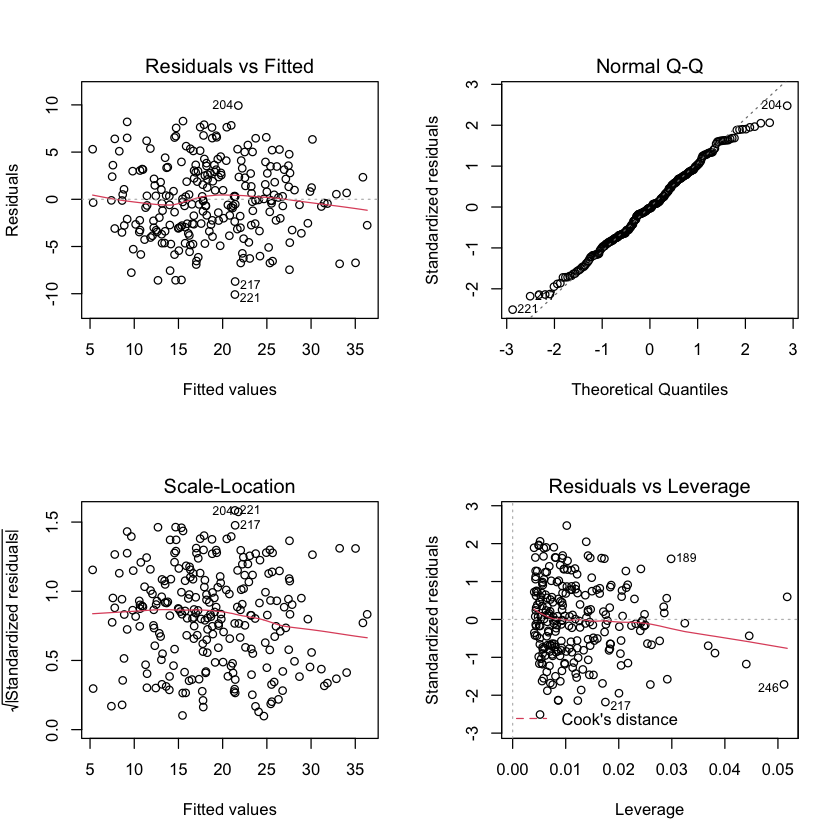

In [60]:
FinalModel=lm(BODYFAT ~ ABDOMEN + WEIGHT,        data=CleanData)
summary(FinalModel)
par(mfrow=c(2,2)) 
plot(FinalModel)

Our final model:

BODYFAT = 0.89355  ABDOMEN -0.11893 WEIGHT -42.39091

With test of H0: coefficient of WEIGHT (or ABDOMEN) is 0, H1: coefficient of WEIGHT (or ABDOMEN) is not 0

All p value is smaller than 0.05, means that we will reject H0: coefficient of WEIGHT (or ABDOMEN) is 0. 

All coefficients are significant, there are clear linear relationships between BODYFAT and the two variables. 

Rule of thumb is sum of 0.89355 times ABDOMEN, -0.11893 times WEIGHT and -42.39091, which will be the BODYFAT(%)

Example usage: for example, a person with 154.25 lbs WEIGHT, 85.2 cm ABDOMEN, his predicted BODYFAT will be 15%, the 95% CI will be [7.43,23.4]. There is a 95% probability that his body fat is between 7.43% and 23.4%. 


In [61]:
predict(FinalModel,newdata=data.frame(WEIGHT=154.25,ABDOMEN=85.2),interval="predict")

,fit,lwr,upr
1,15.39384,7.427139,23.36053




The Rsquare is 0.7053, our model can explain about 71% of variability in dataset. 

From our model we can see that:

by increasing one unit in ABDOMEN with other variables hold, BODYFAT will increase 0.89355%, 

by increasing one unit in WEIGHT with other variables hold, BODYFAT will decrease 0.11893%, 

And the 95% CI for coefficient is:

In [65]:
confint(FinalModel)

,2.5 %,97.5 %
(Intercept),-47.3985640,-37.3832595
ABDOMEN,0.7895427,0.9975474
WEIGHT,-0.1575816,-0.0802828


Which means that we are 95% confident that the interval above contains the true coefficients.


In [66]:
vif = car::vif(FinalModel) 
mean(vif) 
vif


[1] 4.038365

ABDOMEN   WEIGHT 
4.038365 4.038365

There is no serious multicollinearity

### Standardized Residuals

Standardized residuals:
$$r_i=\frac{e_i}{\sqrt{\hat{\sigma}^2(1-h_{ii})}}$$
where $e = y-\hat{y}$, $h_{ii}$ is diagonal elements from  $H=X(X'X)^{-1}X'$ and $\hat{\sigma}^2=\text{MSE}$.

Standardized residuals can compare residuals with the same scale. There is no rule of thumb for standardized residuals, the ith observation may be outliers if $r_i$ is large. Residual plots is also for test linearity and constant variance assumptions.

Saving 7 x 7 in image



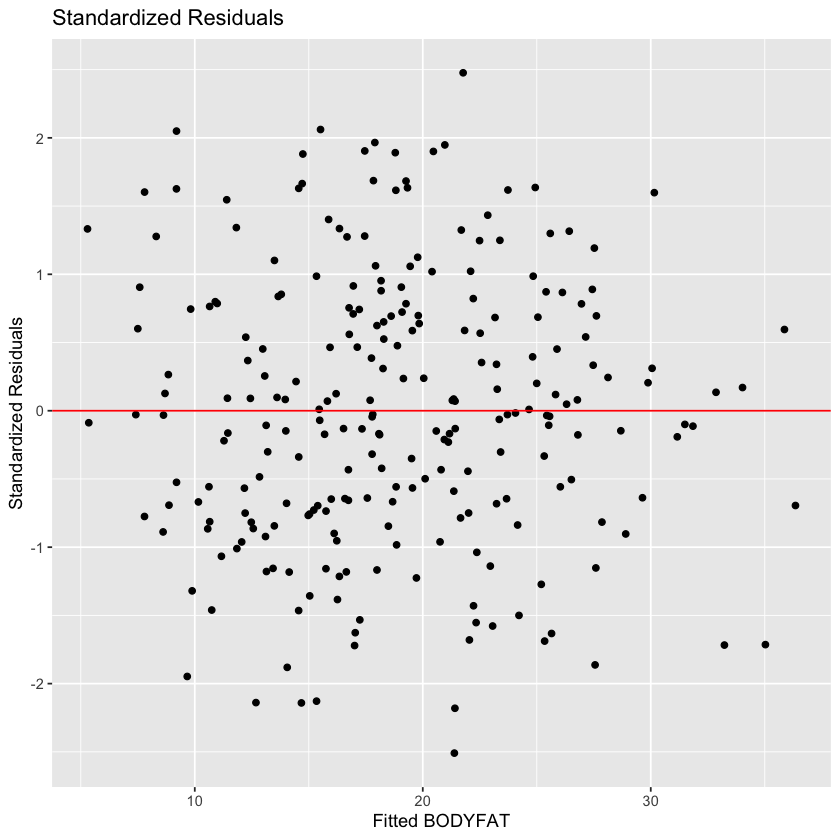

In [67]:

g=ggplot()+
geom_point(aes(x=predict(FinalModel),rstandard(FinalModel)))+
xlab("Fitted BODYFAT")+
ylab("Standardized Residuals")+
ggtitle("Standardized Residuals")+
geom_hline(yintercept = 0,color="red")
ggsave("Image/Final_Model_Standardized_Residuals.jpeg",g)
g

There is no obvious outliers from standardized residuals plots and there is no special pattern, which means that the linearity and constant variance assumptions hold.

### QQ plot for residual 

QQ plot is for test of normality assumption. 

pdf 
  2

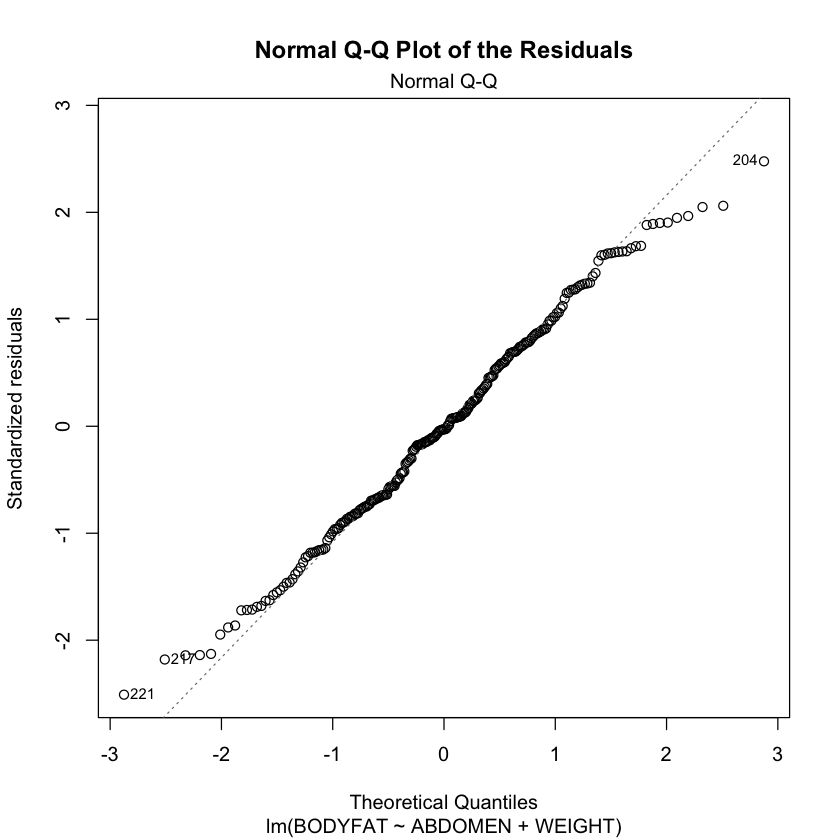

In [71]:
plot(FinalModel, which=c(2),main="Normal Q-Q Plot of the Residuals")
jpeg(file="Image/Final_Model_QQPLOT.jpeg")
plot(FinalModel, which=c(2),main="Normal Q-Q Plot of the Residuals")
dev.off()

In [72]:
shapiro.test(rstandard(FinalModel))


	Shapiro-Wilk normality test

data:  rstandard(FinalModel)
W = 0.99256, p-value = 0.2481


The normality perform well in our model except some outliers, the same result can also be got from the Shapiro–Wilk test, which is a test of normality. p-value is larger than 0.05, we regard that the residual meets the normal distribution. Our model meets normality assumption. 

### Leverage Plots

The leverage $h_{ii}$ (diagonal elements from  $H=X(X'X)^{-1}X'$)  is a measure of the distance between $X_i$ and mean of $X$. The rule of thumb is that if $h_{ii}$ is larger than $2*p/n$. It will be a outlying in $X$. $p$ is number of variables in model including intercept. 

In [73]:
dim(model.matrix(FinalModel))

[1] 248   3

Saving 7 x 7 in image



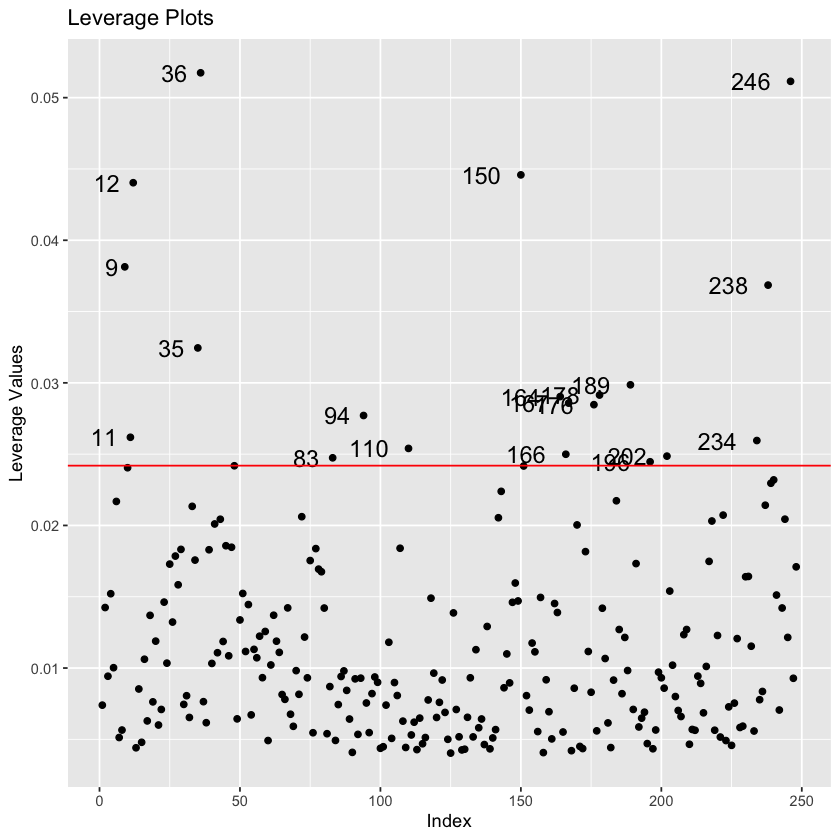

In [75]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
outliers=which(hatvalues(FinalModel)>2*p/n)
g=ggplot()+
geom_point(aes(x=1:n, hatvalues(FinalModel)))+
geom_text(aes(x=outliers,y=hatvalues(FinalModel)[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("Leverage Values")+
ggtitle("Leverage Plots")+
geom_hline(yintercept =2*p/n,color="red")
ggsave("Image/Final_Model_Leverage_Plots.jpeg",g)
g

There is a lot of outliers from Leverage plots, but if you try to build a new model for dataset without outliers, there is almost no difference between the new and old models. So we decide to keep the initial model.

In [76]:
FinalModel2=lm(BODYFAT ~ ABDOMEN + WEIGHT,data=CleanData[-outliers,]) 

In [77]:
summary(FinalModel2)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData[-outliers, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2281  -2.9968  -0.0851   3.0790   9.8780 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43.13627    2.97970 -14.477  < 2e-16 ***
ABDOMEN       0.88971    0.06617  13.445  < 2e-16 ***
WEIGHT       -0.11196    0.02451  -4.567 8.13e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.067 on 225 degrees of freedom
Multiple R-squared:  0.6618,	Adjusted R-squared:  0.6588 
F-statistic: 220.2 on 2 and 225 DF,  p-value: < 2.2e-16


### Cook's distance

$$D_i=\frac{\sum_{j=1}^n(\hat{y}_j-\hat{y}_{j(i)})^2}{p\hat{\sigma}^2}$$ is called Cook's distance, where $\hat{y}_{j(i)}$ are the prediction for point $j$ without observation $i$ included in regression.  which measure the influence of ith observation on all n fitted values. The rule of thumb is that if $D_i$ is larger than $F_{0.5}(p,n-p)$, we regard it as a outliers. 

Saving 7 x 7 in image



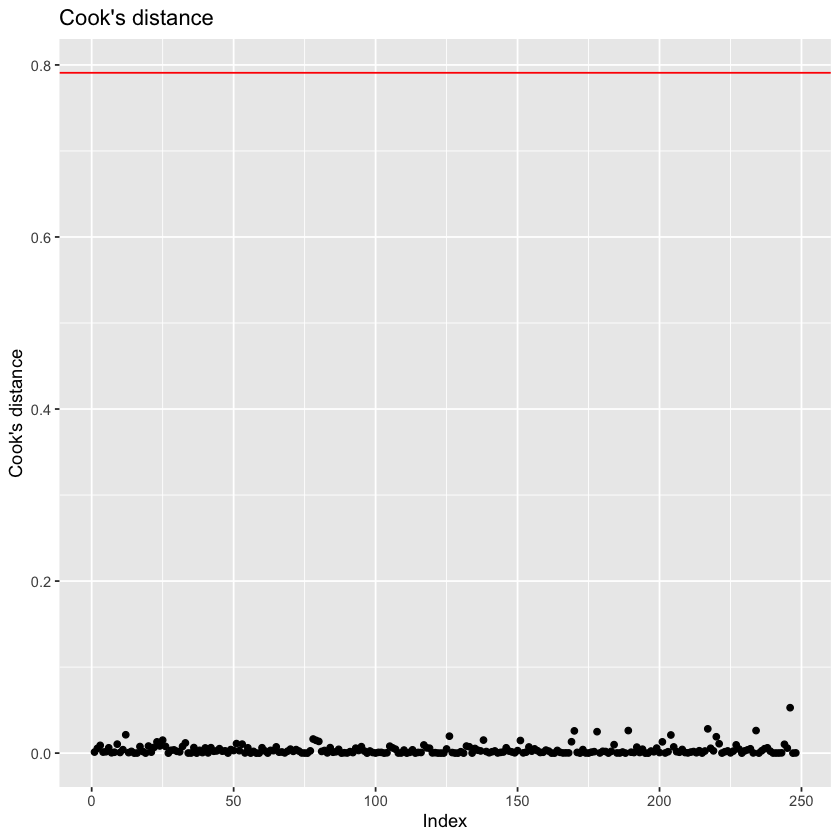

In [78]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
cooki=cooks.distance(FinalModel)
outliers=which(cooki>qf(0.5, p, n-p))
g=ggplot()+
geom_point(aes(x=1:n, y=cooki))+
geom_text(aes(x=outliers,y=cooki[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("Cook's distance")+
ggtitle("Cook's distance")+
geom_hline(yintercept =qf(0.5, p, n-p),color="red")
ggsave("Image/Final_Model_Cooks_distance.jpeg",g)
g

No outliers from Cook's distance plot. 

### DFFITS

$$\text{DFFITS}_i = \frac{\hat{y}_i-\hat{y}_{i(i)}}{\hat{\sigma}_{(i)}\sqrt{h_{ii}}}$$ where $\hat{y}_{i(i)}$ are the prediction for point $i$ without observation $i$ included in regression. 

DFFITS measures the influence of the ith observation on the fitted value $\hat{y}_i$. The rule of thumb for small dataset is $abs(DFFITS)>1$, for large dataset is $abs(DFFITS)>2\sqrt{p/n}$

Saving 7 x 7 in image



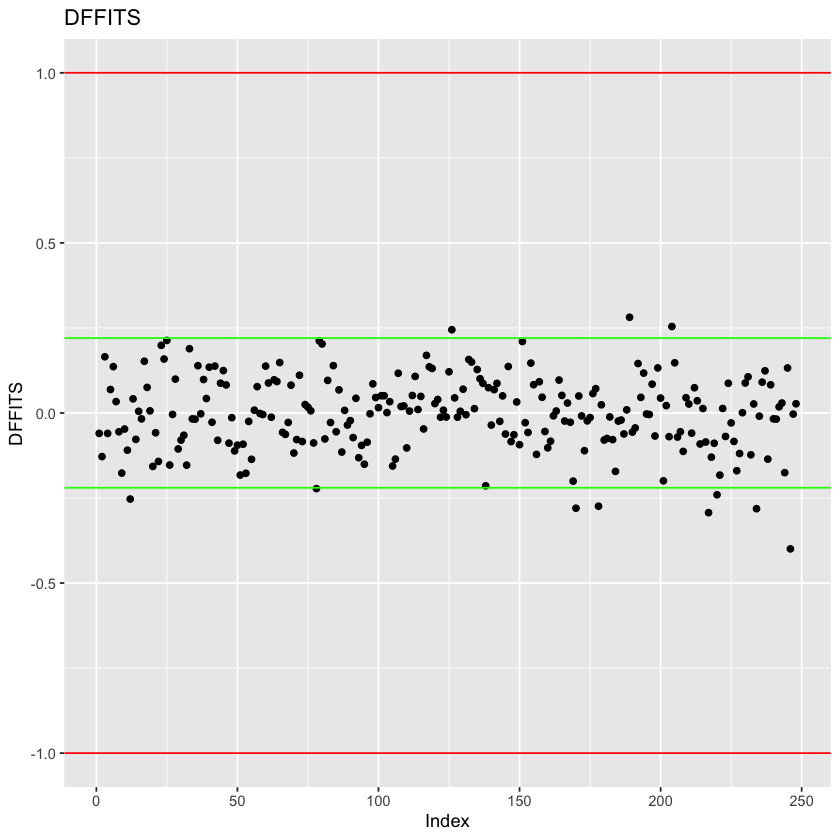

In [80]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFFITS=dffits(FinalModel)
outliers=which(abs(DFFITS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFFITS))+
geom_text(aes(x=outliers,y=DFFITS[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFFITS")+
ggtitle("DFFITS")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2*sqrt(p/n),color="green")+
geom_hline(yintercept =-2*sqrt(p/n),color="green")
ggsave("Image/Final_Model_DFFITS.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DFFITS.

### DFBETAS

$$\text{DFBETAS}_{k(i)}=\frac{\hat{\beta}_k-\hat{\beta}_{k(i)}}{\sqrt{\hat{\sigma}^2_{(i)}(X^T X)^{-1}_{kk}}}$$ is DFBETAS, $\hat{\beta}_{k(i)}$ is the estimated kth parameters without i points.

The DFBETAS measures the influence of ith observation on the fit of the regression coefficient $\beta_k$. The rule of thumb for small dataset is $abs(DFBETAS)>1$, for large dataset is $abs(DFBETAS)>2/\sqrt{n}$

Saving 7 x 7 in image



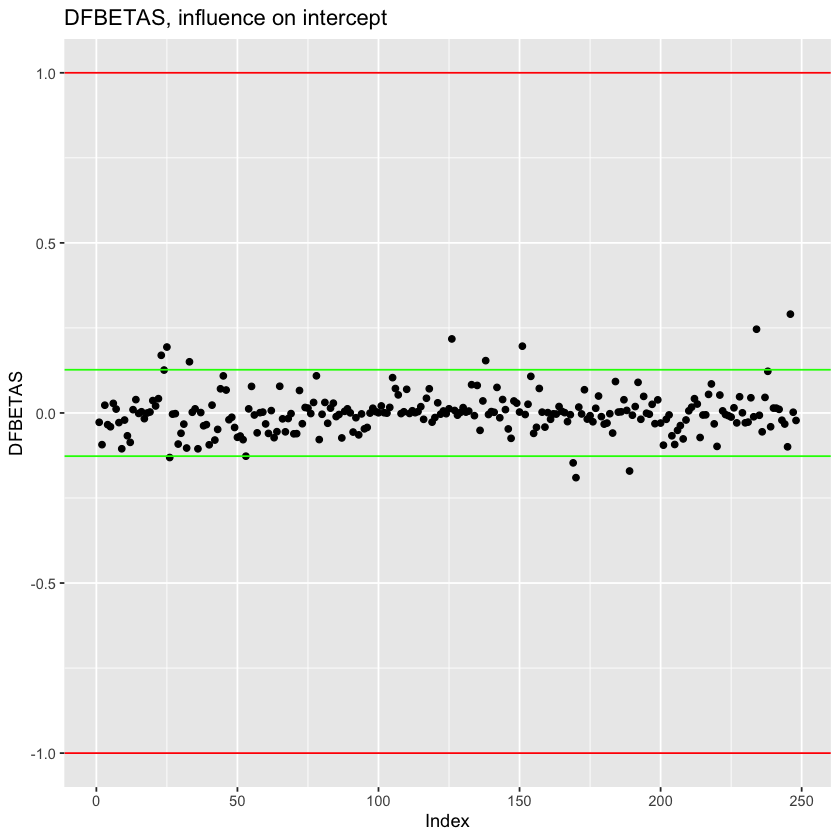

In [81]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFBETAS=dfbetas(FinalModel)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,1]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on intercept")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_intercept.jpeg",g)
g

Saving 7 x 7 in image



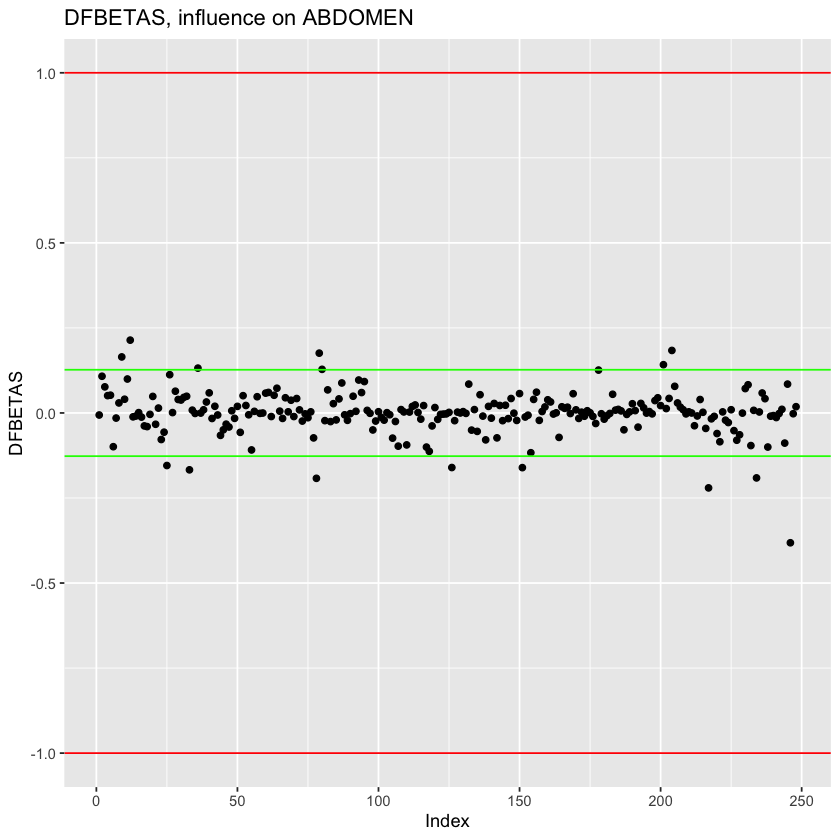

In [82]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFBETAS=dfbetas(FinalModel)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,2]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],
                label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on ABDOMEN")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_ABDOMEN.jpeg",g)
g

Saving 7 x 7 in image



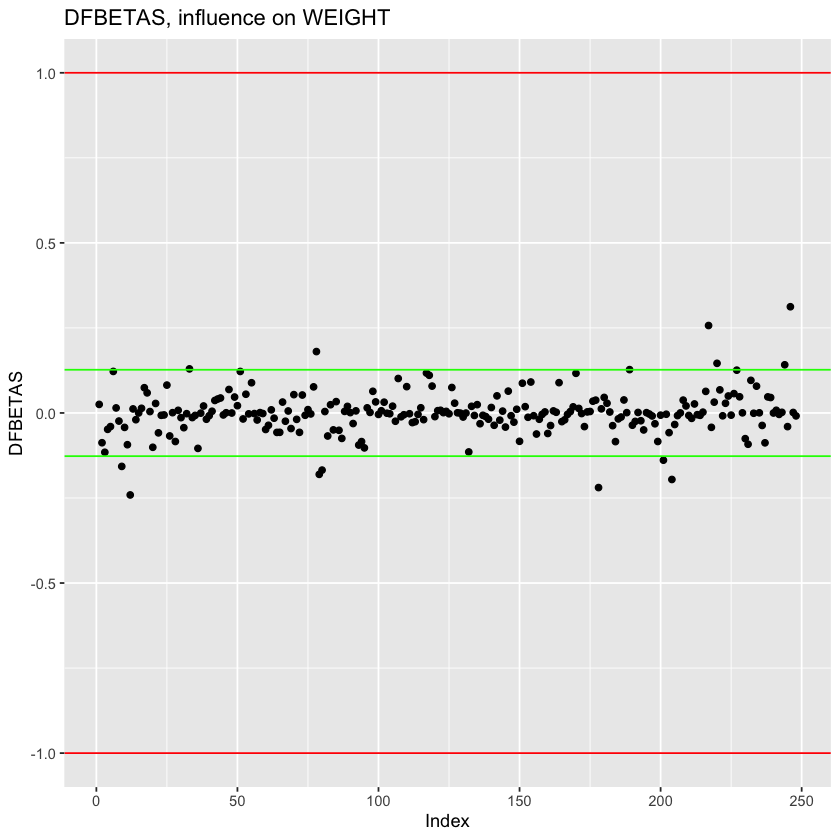

In [83]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFBETAS=dfbetas(FinalModel)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,3]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],label=outliers),size = 5,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on WEIGHT")+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_WEIGHT.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DFBETAS.


### Strength and Weakness of Model

Our model enjoys good R square and small sum of residual. The linearity, normality and constant variance assumptions hold. The model explain more than 70% of variation in body fat with only 2 inputs. We expect more detailed data which can improve our model R squared and standard error. 